In [117]:
import csv
import requests
import json
import pandas as pd
import glob
import os
from uszipcode import SearchEngine
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import datetime as dt


In [36]:
#getting all of the pizza places and putting it into a csv file,getting their
#Name,id,Rating,City,Price,Delivery,Takeout,Reservations
#using my api key in the api_key
api_key = ""

# The API endpoint to search for businesses
endpoint = "https://api.yelp.com/v3/businesses/search"

# The header for the API request
headers = {
    "Authorization": f"Bearer {api_key}"
}

# The parameters for the API request
#location changes by the name of the country
parameters = {
    "term": "pizza",
    "location": "Nevada County",
    "limit": 50,
    "offset": 0
}

# Open a CSV file for writing
with open("pizza_places_in_Nevada_County.csv", "w", newline="") as file:
    # Create a CSV writer
    writer = csv.writer(file)
    
    # Write the header row
    writer.writerow(["Name","id","Rating", "City", "Price", "Delivery","Takeout","Reservations"])
    
    while True:
        # Make the API request
        response = requests.get(endpoint, headers=headers, params=parameters)
        
        # Check if the request was successful
        if response.status_code == 200:
            # Parse the JSON response
            businesses = response.json()["businesses"]
            
            # Loop through the businesses
            for business in businesses:
                # Get the required information from the business
                name = business["name"]
                id = business["id"]
                rating = business["rating"]
                city = business["location"]["city"]
                price = business.get("price", "Not available")
                delivery = "Yes" if "delivery" in business["transactions"] else "No"
                takeout = "Yes" if "pickup" in business["transactions"] else "No"
                reservations= "Yes" if "restaurant_reservation" in business["transactions"] else "No"
                
                # Write the information to the CSV file
                writer.writerow([name, id, rating, city, price,delivery,takeout,reservations ])
                
            # Check if there are more businesses to retrieve
            if len(businesses) < parameters["limit"]:
                break
            else:
                parameters["offset"] += parameters["limit"]
        else:
            # If the request was not successful, raise an error
            response.raise_for_status()

HTTPError: 400 Client Error: Bad Request for url: https://api.yelp.com/v3/businesses/search?term=pizza&location=Nevada+County&limit=50&offset=1000

In [37]:
# Read the CSV file into a DataFrame
df = pd.read_csv("pizza_places_in_Nevada_County.csv", encoding="Windows-1252")

num_rows, num_cols = df.shape
# Print the DataFrame
print(df.shape)
print(num_rows * num_cols)
df


(1000, 8)
8000


,Name,id,Rating,City,Price,Delivery,Takeout,Reservations
0,For Real Dough Pizza,ATub4fgqH_l2Nd1VyNW_dw,4.0,Soda Springs,Not available,No,No,No
1,Base Camp Pizza,PseBu4kUFheNa9WMq-u7FA,4.5,South Lake Tahoe,$$,No,No,No
2,The Pizza Joint,BHGB-bMcD9VlmtQAk1DxMw,4.5,Nevada City,$,No,No,No
3,Main Street Pizza,AbeYgeJexhcXq0GqbYIX4g,4.0,Colfax,$$,No,No,No
4,Mountain Slice Cafe and Creamery,2fq2kLDy6_YBGywHwORIBw,4.5,Tahoe City,$$,No,No,No
...,...,...,...,...,...,...,...,...
995,Subway,rQDGImQ6SmV2vIFA1t6RAA,3.0,Lincoln,$,No,No,No
996,Chang Bros,9edIO0lZqRLKDtQfH5-UCQ,3.5,Rocklin,$$,No,Yes,No
997,Auntie Anne's,Y0JrbfTea0Fke28kT8M_Rw,3.0,Roseville,$,Yes,Yes,No
998,Subway,gkz2wchajPwfSMJsBiKakw,1.5,Citrus Heights,$,Yes,Yes,No


In [38]:
#gluten free


#using my api key in the api_key
api_key = ""

# The API endpoint to search for businesses
endpoint = "https://api.yelp.com/v3/businesses/search"

# The header for the API request
headers = {
    "Authorization": f"Bearer {api_key}"
}

# The parameters for the API request
parameters = {
    "term": "gluten free pizza",
    "location": "Nevada County",
    "limit": 50,
    "offset": 0,
    "attributes": "Gluten-Free"
}

# Open a CSV file for writing
with open("gluten_free_places_in_Nevada_County.csv", "w", newline="") as file:
    # Create a CSV writer
    writer = csv.writer(file)
    
    # Write the header row
    writer.writerow(["Name","id"])
    
    while True:
        # Make the API request
        response = requests.get(endpoint, headers=headers, params=parameters)
        
        # Check if the request was successful
        if response.status_code == 200:
            # Parse the JSON response
            businesses = response.json()["businesses"]
            
            # Loop through the businesses
            for business in businesses:
                # Get the required information from the business
                name = business["name"]
                id = business["id"]
               
                # Write the information to the CSV file
                writer.writerow([name, id])
                
            # Check if there are more businesses to retrieve
            if len(businesses) < parameters["limit"]:
                break
            else:
                parameters["offset"] += parameters["limit"]
        else:
            # If the request was not successful, raise an error
            response.raise_for_status()

In [39]:

# Load the CSV file into a DataFrame
df = pd.read_csv("gluten_free_places_in_Nevada_County.csv", encoding="Windows-1252")

num_rows, num_cols = df.shape
# Print the DataFrame
print(df.shape)
print(num_rows * num_cols)
df

(576, 2)
1152


,Name,id
0,The Pizza Joint,BHGB-bMcD9VlmtQAk1DxMw
1,Base Camp Pizza,PseBu4kUFheNa9WMq-u7FA
2,Village Pizzeria,OKXD_1dFqfUIPV1TqbSNTw
3,Fireside Pizza,dnVmTNsukTOXmAUue0pncQ
4,Pete's Pizza & Tap House,8ORg3E50jTSD7aVpOymtnA
...,...,...
571,El Pollo Loco,8H4LHWr85J77noHfyV5etw
572,Raley's,xEG1a2-jC7QE4joTibANpQ
573,Olive Garden Italian Restaurant,5iXkCdDM1IlWWTVWSwdO3w
574,Nikki's Chaat Cafe,ZeWNhk_94tdLI5wMBqvDEg


In [40]:
#wheelchair accessible

#using my api key in the api_key
api_key = ""

# The API endpoint to search for businesses
endpoint = "https://api.yelp.com/v3/businesses/search"

# The header for the API request
headers = {
    "Authorization": f"Bearer {api_key}"
}

# The parameters for the API request
parameters = {
    "term": "wheelchair accessible pizza",
    "location": "Nevada County",
    "limit": 50,
    "offset": 0,
    "attributes": "Wheelchair Accessible"
}

# Open a CSV file for writing
with open("wheelchair_accessible_places_in_Nevada_County.csv", "w", newline="") as file:
    # Create a CSV writer
    writer = csv.writer(file)
    
    # Write the header row
    writer.writerow(["Name","id"])
    
    while True:
        # Make the API request
        response = requests.get(endpoint, headers=headers, params=parameters)
        
        # Check if the request was successful
        if response.status_code == 200:
            # Parse the JSON response
            businesses = response.json()["businesses"]
            
            # Loop through the businesses
            for business in businesses:
                # Get the required information from the business
                name = business["name"]
                id = business["id"]
               
                # Write the information to the CSV file
                writer.writerow([name, id])
                
            # Check if there are more businesses to retrieve
            if len(businesses) < parameters["limit"]:
                break
            else:
                parameters["offset"] += parameters["limit"]
        else:
            # If the request was not successful, raise an error
            response.raise_for_status()

In [41]:

# Load the CSV file into a DataFrame
df = pd.read_csv("wheelchair_accessible_places_in_Nevada_County.csv", encoding="Windows-1252")

num_rows, num_cols = df.shape
# Print the DataFrame
print(df.shape)
print(num_rows * num_cols)
df

(552, 2)
1104


,Name,id
0,The Pizza Joint,BHGB-bMcD9VlmtQAk1DxMw
1,Base Camp Pizza,PseBu4kUFheNa9WMq-u7FA
2,Three Forks Bakery & Brewing,VhvAgo5Db0neUYwl57N3Cg
3,Main Street Pizza,AbeYgeJexhcXq0GqbYIX4g
4,Pete's Pizza & Tap House,8ORg3E50jTSD7aVpOymtnA
...,...,...
547,American River Café,nycjrKhTgZ9PfWIw4XUv3w
548,I Love Teriyaki,N-zEqkQPszftZlR1PXTnNg
549,Costa Vida,7RAJpTyLdFrdA3oXKp-XAw
550,Nikki's Chaat Cafe,ZeWNhk_94tdLI5wMBqvDEg


In [42]:
#vegi option

#using my api key in the api_key
api_key = ""

# The API endpoint to search for businesses
endpoint = "https://api.yelp.com/v3/businesses/search"

# The header for the API request
headers = {
    "Authorization": f"Bearer {api_key}"
}

# The parameters for the API request
parameters = {
    "term": "vegan options pizza",
    "location": "Nevada County",
    "limit": 50,
    "offset": 0,
    "attributes": "Vegan Options"
}

# Open a CSV file for writing
with open("vegan_options_places_in_Nevada_County.csv", "w", newline="") as file:
    # Create a CSV writer
    writer = csv.writer(file)
    
    # Write the header row
    writer.writerow(["Name","id"])
    
    while True:
        # Make the API request
        response = requests.get(endpoint, headers=headers, params=parameters)
        
        # Check if the request was successful
        if response.status_code == 200:
            # Parse the JSON response
            businesses = response.json()["businesses"]
            
            # Loop through the businesses
            for business in businesses:
                # Get the required information from the business
                name = business["name"]
                id = business["id"]
               
                # Write the information to the CSV file
                writer.writerow([name, id])
                
            # Check if there are more businesses to retrieve
            if len(businesses) < parameters["limit"]:
                break
            else:
                parameters["offset"] += parameters["limit"]
        else:
            # If the request was not successful, raise an error
            response.raise_for_status()

In [43]:

# Load the CSV file into a DataFrame
df = pd.read_csv("vegan_options_places_in_Nevada_County.csv", encoding="Windows-1252")

num_rows, num_cols = df.shape
# Print the DataFrame
print(df.shape)
print(num_rows * num_cols)
df

(530, 2)
1060


,Name,id
0,The Pizza Joint,BHGB-bMcD9VlmtQAk1DxMw
1,Three Forks Bakery & Brewing,VhvAgo5Db0neUYwl57N3Cg
2,Fireside Pizza,dnVmTNsukTOXmAUue0pncQ
3,Village Pizzeria,OKXD_1dFqfUIPV1TqbSNTw
4,Il Pizzaiolo Wood-fired Pizza,-R4h7lZ_G8FdKPFoiKSdDw
...,...,...
525,Raley's,xEG1a2-jC7QE4joTibANpQ
526,Cha-Cha's Cocina Mexicana,ugGvNDgSeDFicR6RA_zgOQ
527,Panera Bread,acdKpgS-HFaekQIDtUTqDg
528,El Pollo Loco,8H4LHWr85J77noHfyV5etw


In [44]:
#parking option

#using my api key in the api_key
api_key = ""

# The API endpoint to search for businesses
endpoint = "https://api.yelp.com/v3/businesses/search"

# The header for the API request
headers = {
    "Authorization": f"Bearer {api_key}"
}

# The parameters for the API request
parameters = {
    "term": "pizza",
    "location": "Nevada County",
    "limit": 50,
    "offset": 0,
    "attributes": "Street Parking"
}

# Open a CSV file for writing
with open("street_parking_places_in_Nevada_County.csv", "w", newline="") as file:
    # Create a CSV writer
    writer = csv.writer(file)
    
    # Write the header row
    writer.writerow(["Name","id"])
    
    while True:
        # Make the API request
        response = requests.get(endpoint, headers=headers, params=parameters)
        
        # Check if the request was successful
        if response.status_code == 200:
            # Parse the JSON response
            businesses = response.json()["businesses"]
            
            # Loop through the businesses
            for business in businesses:
                # Get the required information from the business
                name = business["name"]
                id = business["id"]
               
                # Write the information to the CSV file
                writer.writerow([name, id])
                
            # Check if there are more businesses to retrieve
            if len(businesses) < parameters["limit"]:
                break
            else:
                parameters["offset"] += parameters["limit"]
        else:
            # If the request was not successful, raise an error
            response.raise_for_status()

HTTPError: 400 Client Error: Bad Request for url: https://api.yelp.com/v3/businesses/search?term=pizza&location=Nevada+County&limit=50&offset=1000&attributes=Street+Parking

In [45]:

# Load the CSV file into a DataFrame
df = pd.read_csv("street_parking_places_in_Nevada_County.csv", encoding="Windows-1252")

num_rows, num_cols = df.shape
# Print the DataFrame
print(df.shape)
print(num_rows * num_cols)
df

(1000, 2)
2000


,Name,id
0,For Real Dough Pizza,ATub4fgqH_l2Nd1VyNW_dw
1,Base Camp Pizza,PseBu4kUFheNa9WMq-u7FA
2,The Pizza Joint,BHGB-bMcD9VlmtQAk1DxMw
3,Main Street Pizza,AbeYgeJexhcXq0GqbYIX4g
4,Mountain Slice Cafe and Creamery,2fq2kLDy6_YBGywHwORIBw
...,...,...
995,Subway,gkz2wchajPwfSMJsBiKakw
996,Taco Bell,ADC6UVtNHkE8x_MBfYbRVQ
997,Pattaya Cafe Thai Cuisine,Ajygikw-2N83-GbevkzUyQ
998,Towne Mart,Bz9xG-_4qaTIU-kQ9GNC7w


In [46]:
#getting the hours 

url = "https://api.yelp.com/v3/businesses/"
headers_dict = {
    #using my api key in the api_key
    "Authorization": "Bearer ",
}

def day_name(day):
    day_names = {
        0: "Sunday",
        1: "Monday",
        2: "Tuesday",
        3: "Wednesday",
        4: "Thursday",
        5: "Friday",
        6: "Saturday"
    }
    if isinstance(day, int) and 0 <= day <= 6:
        return day_names[day]
    else:
        return "Not available"

with open("pizza_places_in_Nevada_county.csv", "r") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # skip the first row
    with open("hours_in_Nevada_country.csv", "w", newline="") as outfile:
        writer = csv.writer(outfile)
        writer.writerow(["id", "Business Name", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
        for row in reader:
            id = row[1]
            response = requests.get(f"{url}{id}", headers=headers_dict)
            business = response.json()
            hours = business.get("hours", [{"open": [{"start": "Not available", "end": "Not available"}]}])
            business_hours = {
                "Monday": "Closed",
                "Tuesday": "Closed",
                "Wednesday": "Closed",
                "Thursday": "Closed",
                "Friday": "Closed",
                "Saturday": "Closed",
                "Sunday": "Closed",
            }
            for day in hours[0]["open"]:
                day_of_week = day_name(day.get("day"))
                if day_of_week != "Not available":
                    open_time = day["start"]
                    close_time = day["end"]
                    business_hours[day_of_week] = f"{open_time} to {close_time}"
            writer.writerow([id, business["name"], business_hours["Monday"], business_hours["Tuesday"], business_hours["Wednesday"], business_hours["Thursday"], business_hours["Friday"], business_hours["Saturday"], business_hours["Sunday"]])


In [47]:
# Load the CSV file into a DataFrame
df = pd.read_csv("hours_in_Nevada_country.csv", encoding="Windows-1252")

num_rows, num_cols = df.shape
# Print the DataFrame
print(df.shape)
print(num_rows * num_cols)
df

(1000, 9)
9000


,id,Business Name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,ATub4fgqH_l2Nd1VyNW_dw,For Real Dough Pizza,Closed,Closed,1200 to 2100,1200 to 2100,1200 to 2100,1200 to 2100,1200 to 2100
1,PseBu4kUFheNa9WMq-u7FA,Base Camp Pizza,1100 to 2100,1100 to 2100,1100 to 2100,1100 to 2200,1100 to 2200,1100 to 2100,1100 to 2100
2,BHGB-bMcD9VlmtQAk1DxMw,The Pizza Joint,1500 to 2100,1130 to 2100,1130 to 2100,1130 to 2100,1130 to 2200,1200 to 2030,1500 to 2100
3,AbeYgeJexhcXq0GqbYIX4g,Main Street Pizza,1100 to 2000,1100 to 2000,1100 to 2000,1100 to 2100,1100 to 2100,1100 to 2000,1100 to 2000
4,2fq2kLDy6_YBGywHwORIBw,Mountain Slice Cafe and Creamery,1200 to 2000,1200 to 2000,1200 to 2000,1200 to 2000,1200 to 2000,1200 to 2000,1200 to 2000
...,...,...,...,...,...,...,...,...,...
995,rQDGImQ6SmV2vIFA1t6RAA,Subway,1100 to 0000,1100 to 0000,1100 to 0000,1100 to 0300,1100 to 0300,1100 to 0000,1100 to 0000
996,9edIO0lZqRLKDtQfH5-UCQ,Chang Bros,1600 to 2100,1600 to 2100,1600 to 2100,1600 to 2100,1100 to 2100,1200 to 2100,1600 to 2100
997,Y0JrbfTea0Fke28kT8M_Rw,Auntie Anne's,1100 to 1900,1100 to 1900,1100 to 1900,1100 to 1900,1100 to 1900,1100 to 1900,1100 to 1900
998,gkz2wchajPwfSMJsBiKakw,Subway,0830 to 2130,0830 to 2130,0830 to 2130,0830 to 2130,0830 to 2130,0830 to 2130,0830 to 2130


In [50]:
#merging all the one word countries without the hours

# Define the categories and the corresponding file names
categories = {
    'gluten_free': 'gluten_free_places_in_{}_County.csv',
    'wheelchair_accessible': 'wheelchair_accessible_places_in_{}_County.csv',
    'street_parking': 'street_parking_places_in_{}_County.csv',
    'vegan_options': 'vegan_options_places_in_{}_County.csv'
}

# Get a list of all the CSV files
file_names = glob.glob('pizza_places_in_*_County.csv')

# Loop through the files and merge the data
for file_name in file_names:
    # Extract the name of the county from the file name
    county_name = file_name.split('_')[3]
    
    # Read the data from the pizza places file
    with open(file_name, 'r') as f:
        reader = csv.DictReader(f)
        pizza_data = [row for row in reader]

    # Loop through the categories and add the corresponding information
    category_data = {}
    for category, category_file_name in categories.items():
        # Read the data from the category file
        with open(category_file_name.format(county_name), 'r') as f:
            reader = csv.DictReader(f)
            category_data[category] = set(row['id'] for row in reader)
        
    # Add the category information to the pizza data
    merged_data = []
    processed_ids = set()  # to keep track of the ids that have already been processed
    for row in pizza_data:
        id = row['id']
        if id in processed_ids:
            continue  # skip adding information for the place if its id has already been processed
        processed_ids.add(id)  # add the id to the set of processed ids
        row.update({category: 'yes' if id in category_data[category] else 'no' for category in categories})
        merged_data.append(row)

    # Write the merged data to a new file
    df = pd.DataFrame(merged_data)
    output_file_name = f'pizza_places_in_{county_name}_County.csv'
    df.to_csv(output_file_name, index=False)



In [51]:
# Load the CSV file into a DataFrame
df = pd.read_csv("pizza_places_in_Nevada_County.csv", encoding="Windows-1252")

num_rows, num_cols = df.shape
# Print the DataFrame
print(df.shape)
print(num_rows * num_cols)
df

(996, 12)
11952


,Name,id,Rating,City,Price,Delivery,Takeout,Reservations,gluten_free,wheelchair_accessible,street_parking,vegan_options
0,For Real Dough Pizza,ATub4fgqH_l2Nd1VyNW_dw,4.0,Soda Springs,Not available,No,No,No,no,no,yes,no
1,Base Camp Pizza,PseBu4kUFheNa9WMq-u7FA,4.5,South Lake Tahoe,$$,No,No,No,yes,yes,yes,yes
2,The Pizza Joint,BHGB-bMcD9VlmtQAk1DxMw,4.5,Nevada City,$,No,No,No,yes,yes,yes,yes
3,Main Street Pizza,AbeYgeJexhcXq0GqbYIX4g,4.0,Colfax,$$,No,No,No,yes,yes,yes,no
4,Mountain Slice Cafe and Creamery,2fq2kLDy6_YBGywHwORIBw,4.5,Tahoe City,$$,No,No,No,no,yes,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...
991,Subway,rQDGImQ6SmV2vIFA1t6RAA,3.0,Lincoln,$,No,No,No,yes,no,yes,no
992,Chang Bros,9edIO0lZqRLKDtQfH5-UCQ,3.5,Rocklin,$$,No,Yes,No,no,no,no,no
993,Auntie Anne's,Y0JrbfTea0Fke28kT8M_Rw,3.0,Roseville,$,Yes,Yes,No,no,no,yes,no
994,Subway,gkz2wchajPwfSMJsBiKakw,1.5,Citrus Heights,$,Yes,Yes,No,yes,no,yes,yes


In [52]:
#merging all the two word countries without the hours


# Read the list of ids from each file into sets
gluten_free_ids = set()
with open('gluten_free_places_in_Santa_Cruz_County.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        gluten_free_ids.add(row['id'])

wheelchair_accessible_ids = set()
with open('wheelchair_accessible_places_in_Santa_Cruz_County.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        wheelchair_accessible_ids.add(row['id'])

street_parking_ids = set()
with open('street_parking_places_in_Santa_Cruz_County.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        street_parking_ids.add(row['id'])

vegan_options_ids = set()
with open('vegan_options_places_in_Santa_Cruz_County.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        vegan_options_ids.add(row['id'])

# Read the data from pizza_places_in_Alameda_County.csv and add information about gluten_free, wheelchair,
# parking, and vegan_options
merged_data = []
with open('pizza_places_in_Santa_Cruz_County.csv', 'r') as f:
    reader = csv.DictReader(f)
    headers = list(reader.fieldnames) + ['gluten_free', 'wheelchair', 'parking', 'vegan_options']
    for row in reader:
        id = row['id']
        gluten_free = 'yes' if id in gluten_free_ids else 'no'
        wheelchair = 'yes' if id in wheelchair_accessible_ids else 'no'
        parking = 'yes' if id in street_parking_ids else 'no'
        vegan_options = 'yes' if id in vegan_options_ids else 'no'
        merged_data.append(dict(row, gluten_free=gluten_free, wheelchair=wheelchair,
                                parking=parking, vegan_options=vegan_options))

# Write the merged data to merged_pizza_places_in_Alameda_County.csv
with open('pizza_places_in_Santa_Cruz_County.csv', 'w', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=headers)
    writer.writeheader()
    writer.writerows(merged_data)


In [53]:
# Load the CSV file into a DataFrame
df = pd.read_csv("pizza_places_in_Los_Angeles_County.csv", encoding="Windows-1252")

num_rows, num_cols = df.shape
# Print the DataFrame
print(df.shape)
print(num_rows * num_cols)
df

(1000, 8)
8000


,Name,id,Rating,City,Price,Delivery,Takeout,Reservations
0,Burattino Brick Oven Pizza,hoDyre6_DPlhdXZ2uQAFuA,4.0,Carson,$$,Yes,Yes,No
1,Burattino Brick Oven Pizza,Zi9EPoxrfNb0Xj9miqtNXQ,4.0,Rancho Palos Verdes,$$,Yes,Yes,No
2,Prince Street Pizza,J7XaREYBkIiRlK2rnHNDXQ,4.5,Los Angeles,Not available,No,No,No
3,L'Antica Pizzeria Da Michele,88kri8FhXy8b3DQ_QjSMmQ,4.5,Los Angeles,$$$,Yes,Yes,No
4,Prince Street Pizza,NmyEFw_9tKeHarAiUvtF3w,4.5,West Hollywood,Not available,Yes,Yes,No
...,...,...,...,...,...,...,...,...
995,Gardenia Market Deli & Pizzeria,FBD2OrQpWPic3-h-dL4QiA,4.5,Glendale,$,Yes,Yes,No
996,The Pizza Store,1gKjtG1uzIgQ_TUw4iplLQ,4.0,Placentia,$$,Yes,Yes,No
997,Pamore Pizza,QfqYK4E4PxWPYD-Kr7whVw,3.5,Whittier,$,Yes,Yes,No
998,Black,hrs6APhpu-XSSdW59E5ZGA,4.0,Long Beach,$$,Yes,Yes,No


In [76]:

# Get a list of all the CSV files in the current directory
csv_files = [f for f in os.listdir() if f.endswith('.csv')]

# Loop through each CSV file
for csv_file in sorted(csv_files):
    # Only process files with "pizza_places" in the filename
    if 'pizza_places' not in csv_file:
        continue
    
    # Extract the county name from the filename
    county = csv_file.replace('pizza_places_in_', '').replace('_County.csv', '').replace('_', ' ')
    print(f"Processing {county}...")
    
    # Create a dictionary to store the merged data for this county
    data = {}

    # Read the data from the first CSV file
    with open(csv_file, 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            if row['id'].startswith('-'):
                continue
            data[row['id']] = row

    # Read the data from the second CSV file
    hours_file = f"hours_in_{county.replace(' ', '_')}_country.csv"
    with open(hours_file, 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            id = row['ID']
            if id.startswith('-'):
                continue
            for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
                data[id][day] = row[day]

    # Write the merged data to a new CSV file
    output_file = f"{county.replace(' ', '_')}_merged_data.csv"
    with open(output_file, 'w', newline='') as f:
        fieldnames = ['id', 'Name', 'Rating', 'City', 'Price', 'Delivery', 'Takeout', 'Reservations', 'gluten_free', 'wheelchair_accessible', 'street_parking', 'vegan_options', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        writer = csv.DictWriter(f, fieldnames=fieldnames)
        writer.writeheader()
        for row in data.values():
            writer.writerow(row)


Processing Alameda...


KeyError: 'FzmPT5XxeZY_HLAcuWjAEw'

In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv("big_file.csv", encoding="Windows-1252")

num_rows, num_cols = df.shape
# Print the DataFrame
print(df.shape)
print(num_rows * num_cols)
df

In [24]:
# set the path to the directory containing the csv files
path = r'C:\Users\david\pizza project'

# get a list of all csv files in the directory, sorted by city name
all_files = sorted(glob.glob(os.path.join(path, "*_merged_data.csv")))

# create an empty list to store dataframes for each file
df_list = []

# loop through each file and read it into a dataframe
for f in all_files:
    df = pd.read_csv(f, encoding='iso-8859-1')
    df_list.append(df)

# concatenate all dataframes into one big dataframe
big_df = pd.concat(df_list, ignore_index=True)

# drop duplicates based on the 'ID' column
big_df.drop_duplicates(subset='id', keep='first', inplace=True)

# write the big dataframe to a new csv file
big_df.to_csv("big_file.csv", index=False)


In [26]:
# Load the CSV file into a DataFrame
df = pd.read_csv("big_file.csv", encoding="Windows-1252")

num_rows, num_cols = df.shape
# Print the DataFrame
print(df.shape)
print(num_rows * num_cols)
df

(13469, 19)
255911


,id,Name,Rating,City,Price,Delivery,Takeout,Reservations,gluten_free,wheelchair_accessible,street_parking,vegan_options,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,EEb0m7rWzHeC7A5YAoCGXA,Pizza Bello,4.5,Pleasanton,$$,Yes,No,No,yes,yes,yes,yes,1030 to 2100,1030 to 2100,1030 to 2100,1030 to 2130,1030 to 2130,1100 to 2100,1030 to 2100
1,uvCBQevs26owAL7KW2_VIA,Cheese Board Pizza,4.5,Berkeley,$$,Yes,No,No,yes,yes,yes,yes,Closed,Closed,1700 to 2000,1700 to 2000,1700 to 2000,Closed,Closed
2,B25n2_iigST7pzsbCATWHw,Sliver Pizzeria,4.5,Danville,Not available,Yes,Yes,No,yes,no,yes,yes,1100 to 2030,1100 to 2030,1100 to 2030,1100 to 2030,1100 to 2030,1100 to 2030,Closed
3,JbnDMtuzFuYk10KmBfx9nA,Blue Line Pizza,4.0,Danville,$$,Yes,No,No,yes,yes,yes,yes,1130 to 2100,1130 to 2100,1130 to 2100,1130 to 2130,1130 to 2130,1130 to 2100,1130 to 2100
4,I067lOwrEs3gDoWgSKe89w,Susie Pizza,4.5,Hayward,$$,Yes,Yes,No,no,no,yes,no,1100 to 2300,1100 to 2300,1100 to 2300,1100 to 0200,1100 to 0200,1100 to 2300,1100 to 2300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13464,KH6g2ayyrD4Gq5ozHnFq7A,Baskin-Robbins,3.0,Sacramento,$$,Yes,No,No,no,no,no,no,1000 to 2300,1000 to 2300,1000 to 2300,1000 to 2300,1000 to 2300,1000 to 2300,1000 to 2300
13465,cMACJTd-jI596Fn9xixkxQ,Olive Garden Italian Restaurant,3.0,Citrus Heights,$$,Yes,No,No,yes,yes,no,yes,1100 to 2200,1100 to 2200,1100 to 2200,1100 to 2300,1100 to 2300,1100 to 2200,1100 to 2200
13466,Lz94xEHBggKihZoqjf91Aw,Subway Restaurants,2.5,Rio Linda,$,Yes,Yes,No,no,yes,yes,no,0700 to 2100,0700 to 2100,0700 to 2100,0700 to 2100,0800 to 2100,0900 to 2100,0700 to 2100
13467,1tcv-eIKu-HGIs_BUGiBNg,Costco Wholesale,3.5,Citrus Heights,$$,No,No,No,no,yes,no,no,0900 to 2030,0900 to 2030,0900 to 2030,0900 to 2030,0900 to 1900,1000 to 1900,0900 to 2030


In [ ]:
#cleaning the data

In [112]:

# Read the big file into a pandas dataframe
df = pd.read_csv('big_file.csv')

# Check for duplicates based on all columns
duplicates = df[df.duplicated()]

if len(duplicates) == 0:
    print("No duplicates found in the big file.")
else:
    print(f"{len(duplicates)} duplicates found in the big file.")


No duplicates found in the big file.


In [113]:

# read the csv file into a pandas dataframe
df = pd.read_csv('big_file.csv')

# replace 'yes' with 1 and 'no' with 0
df = df.replace({'yes': 1, 'no': 0})
df = df.replace({'Yes': 1, 'No': 0})
# replace 'Not available' with NaN
df = df.replace('Not available',  pd.NaT)

# replace '$' with 1, '$$' with 2, '$$$' with 3, and '$$$$' with 4
df['Price'] = df['Price'].replace({'$': 1, '$$': 2, '$$$': 3, '$$$$': 4})
df = df.drop(['Reservations', 'street_parking'], axis=1)
df = df.dropna()
# save the cleaned dataframe to a new csv file
df.to_csv('change_file.csv', index=False)


In [114]:

# Open the input file for reading
with open('change_file.csv', 'r') as input_file:
    reader = csv.DictReader(input_file)

    # Open the output file for writing
    with open('output_file.csv', 'w', newline='') as output_file:
        writer = csv.DictWriter(output_file, fieldnames=reader.fieldnames)
        writer.writeheader()

        # Loop through each row in the input file
        for row in reader:
            # Check if the restaurant is closed all week
            if row['Monday'] == 'Closed' and row['Tuesday'] == 'Closed' and row['Wednesday'] == 'Closed' and row['Thursday'] == 'Closed' and row['Friday'] == 'Closed' and row['Saturday'] == 'Closed' and row['Sunday'] == 'Closed':
                continue  # skip this row

            # Write the row to the output file
            writer.writerow(row)



In [115]:


# read in the data from the file
data = pd.read_csv('output_file.csv')

# create a function to calculate the opening hours
def calculate_hours(row):
    if row == 'Closed':
        return 0
    else:
        opening, closing = row.split(' to ')
        opening_time = dt.datetime.strptime(opening, '%H%M')
        closing_time = dt.datetime.strptime(closing, '%H%M')
        if closing_time <= opening_time:
            closing_time += dt.timedelta(days=1)
        return (closing_time - opening_time).total_seconds() / 3600

# apply the function to each row in the Monday-Sunday columns
for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    data[day] = data[day].apply(calculate_hours)

data.to_csv('clean_file.csv', index=False)

In [116]:
# Load the CSV file into a DataFrame
df = pd.read_csv("clean_file.csv", encoding="Windows-1252")

num_rows, num_cols = df.shape
# Print the DataFrame
print(df.shape)
print(num_rows * num_cols)
df

(11069, 17)
188173


,id,Name,Rating,City,Price,Delivery,Takeout,gluten_free,wheelchair_accessible,vegan_options,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,EEb0m7rWzHeC7A5YAoCGXA,Pizza Bello,4.5,Pleasanton,2,1,0,1,1,1,10.5,10.5,10.5,11.0,11.0,10.0,10.5
1,uvCBQevs26owAL7KW2_VIA,Cheese Board Pizza,4.5,Berkeley,2,1,0,1,1,1,0.0,0.0,3.0,3.0,3.0,0.0,0.0
2,JbnDMtuzFuYk10KmBfx9nA,Blue Line Pizza,4.0,Danville,2,1,0,1,1,1,9.5,9.5,9.5,10.0,10.0,9.5,9.5
3,I067lOwrEs3gDoWgSKe89w,Susie Pizza,4.5,Hayward,2,1,1,0,0,0,12.0,12.0,12.0,15.0,15.0,12.0,12.0
4,NaWp4xCspGDX0YOs6zc3hA,Zachary's Chicago Pizza,4.5,Pleasanton,2,1,0,1,1,1,10.0,10.0,10.0,10.5,10.5,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11064,KH6g2ayyrD4Gq5ozHnFq7A,Baskin-Robbins,3.0,Sacramento,2,1,0,0,0,0,13.0,13.0,13.0,13.0,13.0,13.0,13.0
11065,cMACJTd-jI596Fn9xixkxQ,Olive Garden Italian Restaurant,3.0,Citrus Heights,2,1,0,1,1,1,11.0,11.0,11.0,12.0,12.0,11.0,11.0
11066,Lz94xEHBggKihZoqjf91Aw,Subway Restaurants,2.5,Rio Linda,1,1,1,0,1,0,14.0,14.0,14.0,14.0,13.0,12.0,14.0
11067,1tcv-eIKu-HGIs_BUGiBNg,Costco Wholesale,3.5,Citrus Heights,2,0,0,0,1,0,11.5,11.5,11.5,11.5,10.0,9.0,11.5


In [73]:
#changing the name of each city to numbers in the next order:
#1,up to 5k
#2,up to 20k
#3,uo to 50k
#4,up to 100k
#5,up to 300k
#6,up to 1m
#7,up to 3m
#8,3 m and aboove
input_file_name = "clean_file.csv"
output_file_name = "final_data.csv"

City_mapping = {
     #up to 5k people
    "Bret Harte": "1",
"Jackson": "1",
"Sonora": "1",
"Lake Wildwood": "1",
"Needles": "1",
"Denair": "1",
"Salton City": "1",
"Guerneville": "1",
"Myrtletown": "1",
"Phoenix Lake": "1",
"Indian Wells": "1",
"Brisbane": "1",
"Coarsegold": "1",
"Mather": "1",
"Greenacres": "1",
"Santa Ynez": "1",
"McSwain": "1",
"Wrightwood": "1",
"Lake of the Pines": "1",
"Emerald Lake Hills": "1",
"Armona": "1",
"Granite Hills": "1",
"Broadmoor": "1",
"Sunnyside": "1",
"Brooktrails": "1",
"Portola Valley": "1",
"Mecca": "1",
"Carmel Valley Village": "1",
"Harbison Canyon": "1",
"Clearlake Riviera": "1",
"Lenwood": "1",
"Ivanhoe": "1",
"Ford City": "1",
"Bonsall": "1",
"Pixley": "1",
"Lake San Marcos": "1",
"Woodbridge": "1",
"Lockeford": "1",
"Bystrom": "1",
"Meiners Oaks": "1",
"Tarpey Village": "1",
"Del Mar": "1",
"Running Springs": "1",
"Weaverville": "1",
"Coronita": "1",
"North Richmond": "1",
"Santa Venetia": "1",
"Valley Springs": "1",
"Meadowbrook": "1",
"Kelseyville": "1",
"Greenfield CDP": "1",
"Bishop": "1",
"North El Monte": "1",
"French Camp": "1",
"Forestville": "1",
"Old Stine": "1",
"San Joaquin": "1",
"Esparto": "1",
"Planada": "1",
"Rexland Acres": "1",
"Wheatland": "1",
"Angels": "1",
"Squaw Valley": "1",
"Cambrian Park": "1",
"Lake California": "1",
"Fetters Hot Springs-Agua Caliente": "1",
"Hayfork": "1",
"Vandenberg AFB": "1",
"Auburn Lake Trails": "1",
"Mojave": "1",
"Las Lomas": "1",
"Bella Vista": "1",
"Shingle Springs": "1",
"Del Monte Forest": "1",
"Campo": "1",
"San Miguel CDP": "1",
"Loyola": "1",
"Copperopolis": "1",
"Lake Isabella": "1",
"Jamestown": "1",
"Meadow Vista": "1",
"Rollingwood": "1",
"Avalon": "1",
"Lincoln Village": "1",
"Monte Sereno": "1",
"Empire": "1",
"West Menlo Park": "1",
"Desert Edge": "1",
"Felton": "1",
"Hidden Meadows": "1",
"Mission Hills": "1",
"Madera Ranchos": "1",
"Mono Vista": "1",
"Seacliff": "1",
"Crockett": "1",
"Pine Hills": "1",
"Freedom": "1",
"Day Valley": "1",
"Humboldt Hill": "1",
"Rio Dell": "1",
"Vine Hill": "1",
"Cottonwood CDP": "1",
"Burney": "1",
"Strathmore": "1",
"Agua Dulce": "1",
"East Richmond Heights": "1",
"Yountville": "1",
"El Verano": "1",
"Mountain View Acres": "1",
"Arbuckle": "1",
"Morada": "1",
"Amesti": "1",
"Winchester": "1",
"Carmel-by-the-Sea": "1",
"Palo Cedro": "1",
"Mount Shasta": "1",
"Moss Beach": "1",
"Green Acres": "1",
"Desert View Highlands": "1",
"Tipton": "1",
"Cutten": "1",
"Val Verde": "1",
"Reliez Valley": "1",
"Morongo Valley": "1",
"San Antonio Heights": "1",
"Nevada City": "1",
"Marin City": "1",
"Auberry": "1",
"Angwin": "1",
"North Fork": "1",
"Pajaro": "1",
"Kings Beach": "1",
"Frazier Park": "1",
"Lake Nacimiento": "1",
"San Andreas": "1",
"Georgetown": "1",
"Stallion Springs": "1",
"Pine Mountain Lake": "1",
"Lucerne": "1",
"Bret Harte": "1",
"Jackson": "1",
"Sonora": "1",
"Lake Wildwood": "1",
"Needles": "1",
"Denair": "1",
"Salton City": "1",
"Guerneville": "1",
"Myrtletown": "1",
"Phoenix Lake": "1",
"Indian Wells": "1",
"Brisbane": "1",
"Coarsegold": "1",
"Mather": "1",
"Greenacres": "1",
"Santa Ynez": "1",
"McSwain": "1",
"Wrightwood": "1",
"Lake of the Pines": "1",
"Emerald Lake Hills": "1",
"Armona": "1",
"Granite Hills": "1",
"Broadmoor": "1",
"Sunnyside": "1",
"Brooktrails": "1",
"Portola Valley": "1",
"Mecca": "1",
"Carmel Valley Village": "1",
"Harbison Canyon": "1",
"Clearlake Riviera": "1",
"Lenwood": "1",
"Ivanhoe": "1",
"Ford City": "1",
"Bonsall": "1",
"Pixley": "1",
"Lake San Marcos": "1",
"Woodbridge": "1",
"Lockeford": "1",
"Bystrom": "1",
"Meiners Oaks": "1",
"Tarpey Village": "1",
"Del Mar": "1",
"Running Springs": "1",
"Weaverville": "1",
"Coronita": "1",
"North Richmond": "1",
"Santa Venetia": "1",
"Valley Springs": "1",
"Meadowbrook": "1",
"Kelseyville": "1",
"Greenfield CDP": "1",
"Bishop": "1",
"North El Monte": "1",
"French Camp": "1",
"Forestville": "1",
"Old Stine": "1",
"San Joaquin": "1",
"Esparto": "1",
"Planada": "1",
"Rexland Acres": "1",
"Wheatland": "1",
"Angels": "1",
"Squaw Valley": "1",
"Cambrian Park": "1",
"Lake California": "1",
"Fetters Hot Springs-Agua Caliente": "1",
"Hayfork": "1",
"Vandenberg AFB": "1",
"Auburn Lake Trails": "1",
"Mojave": "1",
"Las Lomas": "1",
"Bella Vista": "1",
"Shingle Springs": "1",
"Del Monte Forest": "1",
"Campo": "1",
"San Miguel CDP": "1",
"Loyola": "1",
"Copperopolis": "1",
"Lake Isabella": "1",
"Jamestown": "1",
"Meadow Vista": "1",
"Rollingwood": "1",
"Avalon": "1",
"Lincoln Village": "1",
"Monte Sereno": "1",
"Empire": "1",
"West Menlo Park": "1",
"Desert Edge": "1",
"Felton": "1",
"Hidden Meadows": "1",
"Mission Hills": "1",
"Madera Ranchos": "1",
"Mono Vista": "1",
"Seacliff": "1",
"Crockett": "1",
"Pine Hills": "1",
"Freedom": "1",
"Day Valley": "1",
"Humboldt Hill": "1",
"Rio Dell": "1",
"Vine Hill": "1",
"Cottonwood CDP": "1",
"Burney": "1",
"Strathmore": "1",
"Agua Dulce": "1",
"East Richmond Heights": "1",
"Yountville": "1",
"El Verano": "1",
"Mountain View Acres": "1",
"Arbuckle": "1",
"Morada": "1",
"Amesti": "1",
"Winchester": "1",
"Carmel-by-the-Sea": "1",
"Palo Cedro": "1",
"Mount Shasta": "1",
"Moss Beach": "1",
"Green Acres": "1",
"Desert View Highlands": "1",
"Tipton": "1",
"Cutten": "1",
"Val Verde": "1",
"Reliez Valley": "1",
"Morongo Valley": "1",
"San Antonio Heights": "1",
"Nevada City": "1",
"Marin City": "1",
"Auberry": "1",
"Angwin": "1",
"North Fork": "1",
"Pajaro": "1",
"Kings Beach": "1",
"Frazier Park": "1",
"Lake Nacimiento": "1",
"San Andreas": "1",
"Georgetown": "1",
"Stallion Springs": "1",
"Pine Mountain Lake": "1",
"Lucerne": "1",
"Kelly Ridge": "1",
"North Lakeport": "1",
"Bayview CDP": "1",
"North Shore": "1",
"Casa Conejo": "1",
"Fairbanks Ranch": "1",
"Hoopa": "1",
"Aromas": "1",
"Rancho Santa Fe": "1",
"Hartley": "1",
"Dogtown": "1",
"Bonny Doon": "1",
"Poplar-Cotton Center": "1",
"Woodlands": "1",
"San Pasqual": "1",
"Murphys": "1",
"Temelec": "1",
"Boronda": "1",
"Los Molinos": "1",
"Woodville": "1",
"Linden": "1",
"San Juan Bautista": "1",
"Mountain View CDP": "1",
"Collierville": "1",
"Bell Canyon": "1",
"Red Corral": "1",
"Richgrove": "1",
"Dunsmuir": "1",
"Forest Ranch": "1",
"Saticoy": "1",
"Lewiston": "1",
"Elizabeth Lake": "1",
"Graton": "1",
"Redwood Valley": "1",
"Camanche Village": "1",
"Quincy": "1",
"Seeley": "1",
"Lost Hills": "1",
"Santa Nella": "1",
"Allendale": "1",
"Lagunitas-Forest Knolls": "1",
"Lake Sherwood": "1",
"Vista Santa Rosa": "1",
"Toro Canyon": "1",
"Rancho Tehama Reserve": "1",
"Patterson Tract": "1",
"Pine Valley": "1",
"Baywood Park": "1",
"Green Valley CDP": "1",
"Casa Loma": "1",
"Inverness": "1",
"Harmony Grove": "1",
"Aptos Hills-Larkin Valley": "1",
"Shasta": "1",
"Le Grand": "1",
"Warm Springs": "1",
"Del Rey Oaks": "1",
"Avila Beach": "1",
"Bakersfield Country Club": "1",
"Searles Valley": "1",
"Descanso": "1",
"Lone Pine": "1",
"Home Garden": "1",
"Middletown": "1",
"Big Pine": "1",
"Terra Bella": "1",
"Laton": "1",
"Los Ranchos": "1",
"Redway": "1",
"London": "1",
"Biola": "1",
"Black Point-Green Point": "1",
"Monument Hills": "1",
"Sunnyside-Tahoe City": "1",
"Newcastle": "1",
"Parklawn": "1",
"Leona Valley": "1",
"Ferndale": "1",
"Taft Heights": "1",
"Sonoma State University": "1",
"Hasley Canyon": "1",
"Pioneer": "1",
"Ladera": "1",
"Montague": "1",
"Tuolumne City": "1",
"Del Rio": "1",
"Rolling Hills city": "1",
"Delft Colony": "1",
"Lakeside CDP": "1",
"Lake Don Pedro": "1",
"Garberville": "1",
"Del Rey": "1",
"Westwood": "1",
"Westhaven-Moonstone": "1",
"Jones Valley": "1",
"Fairmead": "1",
"Upper Lake": "1",
"Forest Meadows": "1",
"Irwindale": "1",
"Fruitdale": "1",
"Rouse": "1",
"Colma": "1",
"Taft Mosswood": "1",
"Grayson": "1",
"Los Alamos": "1",
"Julian": "1",
"Sheridan": "1",
"Covelo": "1",
"Maricopa": "1",
"Knightsen": "1",
"Herlong": "1",
"Mariposa": "1",
"Willow Creek": "1",
"Cedar Ridge": "1",
"La Honda": "1",
"Woodacre": "1",
"Fort Dick": "1",
"Trabuco Canyon": "1",
"Foresthill": "1",
"Mount Hermon": "1",
"Brookdale": "1",
"Camanche North Shore": "1",
"Johnstonville": "1",
"Yosemite Valley": "1",
"Airport": "1",
"Grizzly Flats": "1",
"Orange Blossom": "1",
"Elkhorn": "1",
"Thermal": "1",
"Berry Creek": "1",
"Bolinas": "1",
"Junction City": "1",
"Chalfant": "1",
"Littlerock": "1",
"Walnut Grove": "1",
"Chualar": "1",
"Bodega Bay": "1",
"Plymouth": "1",
"Occidental": "1",
"Penn Valley": "1",
"Tahoe Vista": "1",
"Hydesville": "1",
"Big River": "1",
"Stratford": "1",
"Squirrel Mountain Valley": "1",
"Diablo Grande": "1",
"West Park": "1",
"Shandon": "1",
"Maxwell": "1",
"Buttonwillow": "1",
"Pasatiempo": "1",
"March ARB": "1",
"Crowley Lake": "1",
"Clay": "1",
"Lake Riverside": "1",
"Riverdale Park": "1",
"Whitewater": "1",
"Dunnigan": "1",
"Shell Ridge": "1",
"Sea Ranch": "1",
"Matheny": "1",
"Glen Ellen": "1",
"Mi-Wuk Village": "1",
"Acalanes Ridge": "1",
"Penryn": "1",
"El Macero": "1",
"Teviston": "1",
"Gerber": "1",
"Amador Pines": "1",
"Boonville": "1",
"Herald": "1",
"North Edwards": "1",
"Lower Lake": "1",
"Tahoma": "1",
"Beale AFB": "1",
"Sultana": "1",
"Yermo": "1",
"South Dos Palos": "1",
"Loyalton": "1",
"Green Valley CDP": "1",
"Somis": "1",
"McClellan Park": "1",
"Talmage": "1",
"Challenge-Brownsville": "1",
"Los Olivos": "1",
"Alhambra Valley": "1",
"Pala": "1",
"Doyle": "1",
"Soda Bay": "1",
"Douglas City": "1",
"Dollar Point": "1",
"Klamath": "1",
"Greeley Hill": "1",
"Eldridge": "1",
"Knights Landing": "1",
"Alpaugh": "1",
"Tres Pinos": "1",
"Malaga": "1",
"Blue Lake": "1",
"Silverado Resort": "1",
"Lompico": "1",
"Hopland": "1",
"Castle Hill": "1",
"Mesa Verde": "1",
"Waterloo": "1",
"Santa Susana": "1",
"Cedar Flat": "1",
"Alto": "1",
"Norris Canyon": "1",
"Cleone": "1",
"Thornton": "1",
"Tulelake": "1",
"Dorris": "1",
"Johnson Park": "1",
"McCloud": "1",
"Butte Valley": "1",
"Lebec": "1",
"Mountain Mesa": "1",
"Geyserville": "1",
"Monte Rio": "1",
"Ballard": "1",
"Silverado": "1",
"Inyokern": "1",
"Happy Camp": "1",
"Buena Vista": "1",
"Modjeska": "1",
"Petaluma Center": "1",
"Stebbins": "1",
"Patton Village": "1",
"Smith River": "1",
"Santa Margarita": "1",
"Sunol": "1",
"Mountain Gate": "1",
"Minkler": "1",
"Spring Valley CDP": "1",
"Independence": "1",
"Catheys Valley": "1",
"Kernville": "1",
"Kettleman City": "1",
"Fieldbrook": "1",
"Laytonville": "1",
"West Point": "1",
"Wallace": "1",
"Millville": "1",
"Bradbury": "1",
"Shelter Cove": "1",
"Millerton": "1",
"Etna": "1",
"Hickman": "1",
"Aguanga": "1",
"Lake of the Woods": "1",
"Indianola": "1",
"Olde Stockdale": "1",
"Manila": "1",
"Mendocino": "1",
"Cedarville": "1",
"New Cuyama": "1",
"Kenwood": "1",
"Deer Park": "1",
"East Tulare Villa": "1",
"Diablo": "1",
"Davenport": "1",
"North Gate": "1",
"Mokelumne Hill": "1",
"Delleker": "1",
"Linnell Camp": "1",
"Rolling Hills CDP": "1",
"Courtland": "1",
"Cold Springs CDP": "1",
"Onyx": "1",
"Fall River Mills": "1",
"Fuller Acres": "1",
"Greenville": "1",
"East Orosi": "1",
"Fort Jones": "1",
"Cobb": "1",
"Alta": "1",
"Tranquillity": "1",
"Victor": "1",
"Lytle Creek": "1",
"Clyde": "1",
"Fields Landing": "1",
"Blacklake": "1",
"Bodega": "1",
"Carnelian Bay": "1",
"Lakehead": "1",
"Calpella": "1",
"Jacumba": "1",
"Ducor": "1",
"Lake Hughes": "1",
"Paradise Park": "1",
"Valley Acres": "1",
"Traver": "1",
"Butte Creek Canyon": "1",
"Ripley": "1",
"Wilkerson": "1",
"Cowan": "1",
"Bootjack": "1",
"Baker": "1",
"Loleta": "1",
"Summerland": "1",
"Zayante": "1",
"Lockwood CDP": "1",
"San Ardo": "1",
"Westley": "1",
"Round Valley": "1",
"Indio Hills": "1",
"West Goshen": "1",
"Tuttletown": "1",
"Allensworth": "1",
"Lake Almanor Country Club": "1",
"Stinson Beach": "1",
"Isleton": "1",
"El Centro Naval Air Facility": "1",
"Elfin Forest": "1",
"Graeagle": "1",
"Gasquet": "1",
"San Simeon": "1",
"Lemon Cove": "1",
"Lanare": "1",
"Richfield": "1",
"Groveland": "1",
"Plainview": "1",
"Tehama": "1",
"Springville": "1",
"Cohasset": "1",
"Madison": "1",
"Trinity Village": "1",
"Cantua Creek": "1",
"Scotia": "1",
"Woodville Farm Labor Camp": "1",
"Dorrington": "1",
"Potter Valley": "1",
"Fulton": "1",
"Peters": "1",
"Niland": "1",
"River Pines": "1",
"Ballico": "1",
"Grimes": "1",
"Point Arena": "1",
"Terminous": "1",
"Cromberg": "1",
"Muir Beach": "1",
"Plumas Eureka": "1",
"Friant": "1",
"Seville": "1",
"Bridgeport": "1",
"Rough and Ready": "1",
"Bangor": "1",
"McArthur": "1",
"Bend": "1",
"Salyer": "1",
"Miranda": "1",
"Oak Run": "1",
"Boulevard": "1",
"Robbins": "1",
"Clipper Mills": "1",
"Walker": "1",
"Newell": "1",
"Meadow Valley": "1",
"Desert Shores": "1",
"Dillon Beach": "1",
"Rio Oso": "1",
"Dustin Acres": "1",
"Edna": "1",
"Coloma": "1",
"Hamilton Branch": "1",
"Di Giorgio": "1",
"La Vina": "1",
"French Gulch": "1",
"Smartsville": "1",
"Mesa": "1",
"Clarksburg": "1",
"Sierra Brooks": "1",
"Garden Farms": "1",
"Nipinnawasee": "1",
"Potrero": "1",
"El Portal": "1",
"Mexican Colony": "1",
"Pescadero": "1",
"Derby Acres": "1",
"Shaver Lake": "1",
"Meridian": "1",
"San Lucas": "1",
"Whitmore": "1",
"Cazadero": "1",
"Iron Horse": "1",
"Sand City": "1",
"Swall Meadows": "1",
"Mad River": "1",
"Topaz": "1",
"Lake Almanor Peninsula": "1",
"Coleville": "1",
"Vernon": "1",
"Yankee Hill": "1",
"Genoa": "1",
"Edison": "1",
"Salton Sea Beach": "1",
"Anchor Bay": "1",
"Trinidad": "1",
"Lockwood CDP": "1",
"Grenada": "1",
"Chilcoot-Vinton": "1",
"Princeton": "1",
"Grangeville": "1",
"Stirling City": "1",
"Bass Lake": "1",
"Nord": "1",
"Cressey": "1",
"Twain": "1",
"El Nido": "1",
"Concow": "1",
"Raisin City": "1",
    #up to 20k people
"Ben Lomond": "2",
"Kentfield": "2",
"Gridley": "2",
"Nuevo": "2",
"Woodlake": "2",
"Escalon": "2",
"Lake Mathews": "2",
"Hughson": "2",
"Joshua Tree": "2",
"East Foothills": "2",
"Franklin CDP": "2",
"Oceano": "2",
"Mammoth Lakes": "2",
"Sausalito": "2",
"Calipatria": "2",
"Atherton": "2",
"Winters": "2",
"Vandenberg Village": "2",
"Fort Bragg": "2",
"Mira Monte": "2",
"Bermuda Dunes": "2",
"Acton": "2",
"Loomis": "2",
"Contra Costa Centre": "2",
"Homeland": "2",
"Lemoore Station": "2",
"Crescent City": "2",
"Fowler": "2",
"Castroville": "2",
"Thermalito": "2",
"Ladera Heights": "2",
"San Martin": "2",
"Lucas Valley-Marinwood": "2",
"Pollock Pines": "2",
"El Rio": "2",
"Aptos": "2",
"Hilmar-Irwin": "2",
"Colusa": "2",
"South Monrovia Island": "2",
"Wilton": "2",
"Camino Tassajara": "2",
"Huron": "2",
"Highgrove": "2",
"Willows": "2",
"Desert Palms": "2",
"Pleasure Point": "2",
"Oak View": "2",
"Hidden Valley Lake": "2",
"Saranap": "2",
"Eucalyptus Hills": "2",
"Solvang": "2",
"Lucerne Valley": "2",
"Gustine": "2",
"Durham": "2",
"Jamul": "2",
"Fruitridge Pocket": "2",
"Cottonwood CDP": "2",
"Rancho Calaveras": "2",
"West Modesto": "2",
"Rancho Murieta": "2",
"Villa Park": "2",
"Garnet": "2",
"El Granada": "2",
"East Pasadena": "2",
"Old Fig Garden": "2",
"Holtville": "2",
"La Habra Heights": "2",
"East Porterville": "2",
"Dos Palos": "2",
"St. Helena": "2",
"Williams": "2",
"Bonadelle Ranchos": "2",
"Cambria": "2",
"Keyes": "2",
"Ione": "2",
"Mayflower Village": "2",
"Happy Valley": "2",
"Silver Lakes": "2",
"Burbank CDP": "2",
"Yosemite Lakes": "2",
"Palermo": "2",
"Strawberry CDP": "2",
"Twin Lakes CDP": "2",
"Woodside": "2",
"Boulder Creek": "2",
"Mayfair": "2",
"Kensington": "2",
"Oakhurst": "2",
"Calistoga": "2",
"Las Flores CDP": "2",
"Cutler": "2",
"Buellton": "2",
"Goshen": "2",
"Marysville": "2",
"Kingsburg": "2",
"Scotts Valley": "2",
"Alum Rock": "2",
"El Sobrante CDP": "2",
"Newman": "2",
"University of California-Santa Barbara": "2",
"Rossmoor": "2",
"Half Moon Bay": "2",
"Signal Hill": "2",
"Los Alamitos": "2",
"La Riviera": "2",
"Winton": "2",
"Diamond Springs": "2",
"Hillcrest": "2",
"Healdsburg": "2",
"Valley Center": "2",
"Hillsborough": "2",
"Piedmont": "2",
"View Park-Windsor Hills": "2",
"Sierra Madre": "2",
"Anderson": "2",
"Clayton": "2",
"Canyon Lake": "2",
"Fairview": "2",
"East Bakersfield": "2",
"Muscoy": "2",
"Delhi": "2",
"Malibu": "2",
"Blackhawk": "2",
"Sonoma": "2",
"Soquel": "2",
"Morro Bay": "2",
"Placerville": "2",
"Citrus": "2",
"Del Aire": "2",
"Magalia": "2",
"Potomac Park": "2",
"Farmersville": "2",
"Garden Acres": "2",
"Shasta Lake": "2",
"San Diego Country Estates": "2",
"Exeter": "2",
"Corte Madera": "2",
"Madera Acres": "2",
"Quartz Hill": "2",
"Calimesa": "2",
"Golden Hills": "2",
"Capitola": "2",
"East Whittier": "2",
"Rio Vista": "2",
"August": "2",
"Charter Oak": "2",
"Mentone": "2",
"Orange Cove": "2",
"Country Club": "2",
"Lake Arrowhead": "2",
"West Athens": "2",
"Rodeo": "2",
"Marina del Rey": "2",
"Crestline": "2",
"Rancho Mission Viejo": "2",
"Rio del Mar": "2",
"Tiburon": "2",
"Oak Hills": "2",
"Live Oak city": "2",
"Waterford": "2",
"Fort Irwin": "2",
"Cloverdale": "2",
"Taft": "2",
"La Cresta": "2",
"Orosi": "2",
"Gonzales": "2",
"University of California-Davis": "2",
"Los Altos Hills": "2",
"Montecito": "2",
"Templeton": "2",
"Midway City": "2",
"Plumas Lake": "2",
"Heber": "2",
"Rolling Hills Estates": "2",
"Spring Valley Lake": "2",
"Topanga": "2",
"Orland": "2",
"Corning": "2",
"Guadalupe": "2",
"Westlake Village": "2",
"Interlaken": "2",
"Pismo Beach": "2",
"Thousand Palms": "2",
"Firebaugh": "2",
"Alondra Park": "2",
"Gold River": "2",
"Earlimart": "2",
"Good Hope": "2",
"Yreka": "2",
"Boyes Hot Springs": "2",
"Alta Sierra CDP": "2",
"Cherry Valley": "2",
"Paradise town": "2",
"Oroville East": "2",
"Camp Pendleton Mainside": "2",
"South San Gabriel": "2",
"Piñon Hills": "2",
"Ojai": "2",
"California Polytechnic State University": "2",
"Fairfax town": "2",
"Cotati": "2",
"Larkfield-Wikiup": "2",
"Sebastopol": "2",
"East Hemet": "2",
"Imperial": "2",
"Albany": "2",
"Shafter": "2",
"Prunedale": "2",
"South El Monte": "2",
"Casa de Oro-Mount Helix": "2",
"Hermosa Beach": "2",
"South San Jose Hills": "2",
"Arvin": "2",
"Valle Vista": "2",
"Stevenson Ranch": "2",
"Orinda": "2",
"Pinole": "2",
"Arcata": "2",
"Dixon": "2",
"Rosedale": "2",
"Greenfield city": "2",
"Chowchilla": "2",
"Santa Fe Springs": "2",
"Phelan": "2",
"Nipomo": "2",
"Arroyo Grande": "2",
"Blythe": "2",
"Bostonia": "2",
"Castaic": "2",
"Cameron Park": "2",
"Coalinga": "2",
"Laguna Woods": "2",
"Woodcrest": "2",
"El Segundo": "2",
"Rio Linda": "2",
"Rancho Mirage": "2",
"Live Oak CDP": "2",
"Truckee": "2",
"Moraga": "2",
"Ukiah": "2",
"Clearlake": "2",
"McKinleyville": "2",
"Walnut Park": "2",
"Vincent": "2",
"Artesia": "2",
"Fillmore": "2",
"Stanford": "2",
"Susanville": "2",
"Olivehurst": "2",
"Parkway": "2",
"Ripon": "2",
"Coto de Caza": "2",
"Kerman": "2",
"Isla Vista": "2",
"Discovery Bay": "2",
"Los Osos": "2",
"La Palma": "2",
"Alpine": "2",
"Cherryland": "2",
"El Sobrante CDP": "2",
"Pacific Grove": "2",
"Camp Pendleton South": "2",
"California City": "2",
"Salida": "2",
"Parlier": "2",
"Red Bluff": "2",
"Lemon Hill": "2",
"East Rancho Dominguez": "2",
"North Fair Oaks": "2",
"North Auburn": "2",
"Lamont": "2",
"Mill Valley": "2",
"Hawaiian Gardens": "2",
"McFarland": "2",
"Livingston": "2",
"Avenal": "2",
"Alamo": "2",
"Auburn": "2",
"Oak Park": "2",
"Grass Valley": "2",
"King City": "2",
"Palos Verdes Estates": "2",
"Tehachapi": "2",
"Avocado Heights": "2",
"Carpinteria": "2",
"Grand Terrace": "2",
"Solana Beach": "2",
"Larkspur": "2",
"Bonita": "2",
"Sun Village": "2",
"Big Bear City": "2",
"Home Gardens": "2",
"Grover Beach": "2",
"San Anselmo": "2",
"Emeryville": "2",
"San Marino": "2",
"Lindsay": "2",
"Tamalpais-Homestead Valley": "2",
"Mendota": "2",
"Lake Los Angeles": "2",
"Fortuna": "2",
"Commerce": "2",
"Lakeland Village": "2",
        #up to 50k
"Fallbrook": "3",
"Beverly Hills": "3",
"Spring Valley CDP": "3",
"Goleta": "3",
"Seaside": "3",
"Lawndale": "3",
"Desert Hot Springs": "3",
"San Pablo": "3",
"Fair Oaks": "3",
"El Paso de Robles (Paso Robles)": "3",
"Los Altos": "3",
"La Verne": "3",
"Laguna Hills": "3",
"Atwater": "3",
"Saratoga": "3",
"Burlingame": "3",
"Orcutt": "3",
"San Carlos": "3",
"Santa Paula": "3",
"San Lorenzo": "3",
"Monterey": "3",
"Eastern Goleta Valley": "3",
"East Palo Alto": "3",
"Atascadero": "3",
"Banning": "3",
"Suisun City": "3",
"East Niles": "3",
"Walnut": "3",
"Belmont": "3",
"Lathrop": "3",
"Ridgecrest": "3",
"Temescal Valley": "3",
"Lemon Grove": "3",
"Wasco": "3",
"Benicia": "3",
"Twentynine Palms": "3",
"South Pasadena": "3",
"Eureka": "3",
"Lemoore": "3",
"Windsor": "3",
"Brawley": "3",
"Sanger": "3",
"Imperial Beach": "3",
"West Whittier-Los Nietos": "3",
"Norco": "3",
"Hercules": "3",
"El Cerrito city": "3",
"North Tustin": "3",
"Ladera Ranch": "3",
"Maywood": "3",
"Galt": "3",
"Lafayette": "3",
"Seal Beach": "3",
"Reedley": "3",
"Barstow": "3",
"Soledad": "3",
"Bay Point": "3",
"Riverbank": "3",
"Loma Linda": "3",
"Selma": "3",
"Dinuba": "3",
"Rosemont": "3",
"San Fernando": "3",
"Willowbrook": "3",
"Ashland": "3",
"Patterson": "3",
"Calabasas": "3",
"Linda": "3",
"Mountain House": "3",
"Laguna Beach": "3",
"Millbrae": "3",
"Oakdale": "3",
"West Puente Valley": "3",
"Cudahy": "3",
"East San Gabriel": "3",
"Corcoran": "3",
"Marina": "3",
"Bloomington": "3",
"West Carson": "3",
"Rancho San Diego": "3",
"West Rancho Dominguez": "3",
"Winter Gardens": "3",
"Port Hueneme": "3",
"Ramona": "3",
"Valinda": "3",
"American Canyon": "3",
"Duarte": "3",
"Granite Bay": "3",
"Yucca Valley": "3",
"Lennox": "3",
"Lakeside CDP": "3",
"South Lake Tahoe": "3",
"Lomita": "3",
"Mead Valley": "3",
"Coronado": "3",
"La Cañada Flintridge": "3",
"Rosamond": "3",
"Oroville": "3",
"Agoura Hills": "3",
"La Crescenta-Montrose": "3",
"Adelanto": "3",
"Agoura Hills": "3",
"Alameda": "3",
"Alamo": "3",
"Albany": "3",
"Alhambra": "3",
"Aliso Viejo": "3",
"Alondra Park": "3",
"Alpine": "3",
"Alta Sierra": "3",
"Altadena": "3",
"Foster City":"3",
"Pacifica":"3",
"Alum Rock": "3",
"American Canyon": "3",
"Anaheim": "3",
"Anderson": "3",
"Angels City": "3",
"Angwin": "3",
"Antelope": "3",
"Antioch": "3",
"Apple Valley": "3",
"Aptos": "3",
"Arcadia": "3",
"Arcata": "3",
"Arden-Arcade": "3",
"Arroyo Grande": "3",
"Artesia": "3",
"Arvin": "3",
"Ashland": "3",
"Atascadero": "3",
"Atherton": "3",
"Atwater": "3",
"Auburn": "3",
"August": "3",
"Avenal": "3",
"Avocado Heights": "3",
"Azusa": "3",
"Bakersfield": "3",
"Baldwin Park": "3",
"Banning": "3",
"Barstow": "3",
"Bay Point": "3",
"Baywood-Los Osos": "3",
"Beaumont": "3",
"Bell": "3",
"Bell Gardens": "3",
"Bellflower": "3",
"Belmont": "3",
"Belvedere": "3",
"Benicia": "3",
"Berkeley": "3",
"Bermuda Dunes": "3",
"Beverly Hills": "3",
"Big Bear City": "3",
"San Bruno":"3",
"Oakley":"3",
"Pleasant Hill":"3",
"Morgan Hill":"3",
"Big Bear Lake": "3",
"Big River": "3",
"Blackhawk-Camino Tassajara": "3",
"Bloomington": "3",
"Blythe": "3",
"Bonadelle Ranchos-Madera Ranchos": "3",
"Bonita": "3",
"Bostonia": "3",
"Boulder Creek": "3",
"Brawley": "3",
"Brea": "3",
"Brentwood": "3",
"Brisbane": "3",
"Broadmoor": "3",
"Buena Park": "3",
"Burbank": "3",
"Burlingame": "3",
"Buttonwillow": "3",
"Calabasas": "3",
"Calexico": "3",
"California City": "3",
"Calimesa": "3",
"Calipatria": "3",
"Calistoga": "3",
"Camarillo": "3",
"Cambria": "3",
"Cameron Park": "3",
"Camp Pendleton North": "3",
"Camp Pendleton South": "3",
"Campbell": "3",
"Canyon Lake": "3",
"Capitola": "3",
"Carlsbad": "3",
"Carmel-by-the-Sea": "3",
"Carmichael": "3",
"Carpinteria": "3",
"Carson": "3",
"Casa de Oro-Mount Helix": "3",
"Castro Valley": "3",
"Castroville": "3",
"Cathedral City": "3",
"Cayucos": "3",
"Ceres": "3",
"Cerritos": "3",
"Charter Oak": "3",
"Cherryland": "3",
"Chico": "3",
"Chino": "3",
"Chino Hills": "3",
"Chowchilla": "3",
"Chula Vista": "3",
"Citrus": "3",
"Citrus Heights": "3",
"Claremont": "3",
"Clayton": "3",
"Clearlake": "3",
"Cloverdale": "3",
"Clovis": "3",
"Coachella": "3",
"Coalinga": "3",
"Colfax": "3",
"Colma": "3",
"Colton": "3",
"Commerce": "3",
"Compton": "3",
"Concord": "3",
"Corcoran": "3",
"Corning": "3",
"Corona": "3",
"Coronado": "3",
"Corte Madera": "3",
"Costa Mesa": "3",
"Cotati": "3",
"Coto de Caza": "3",
"Country Club": "3",
"Covina": "3",
"Crescent City": "3",
"Crest": "3",
"Cudahy": "3",
"Culver City": "3",
"Cupertino": "3",
"Cypress": "3",
"Daly City": "3",
"Dana Point": "3",
"Danville": "3",
"Davis": "3",
"Del Aire": "3",
"Delano": "3",
"Delhi": "3",
"Denair": "3",
"Desert Hot Springs": "3",
"Diamond Bar": "3",
"Dinuba": "3",
"Discovery Bay": "3",
"Dixon": "3",
"Downey": "3",
"Duarte": "3",
"Dublin": "3",
"Dunsmuir": "3",
"East Compton": "3",
"East Foothills": "3",
"East Hemet": "3",
"East La Mirada": "3",
"East Los Angeles": "3",
"East Oakdale": "3",
"East Palo Alto": "3",
"East Pasadena": "3",
"East Porterville": "3",
"East Quincy": "3",
"East Richmond Heights": "3",
"East San Gabriel": "3",
"East Shore": "3",
"East Sonora": "3",
"Easton": "3",
"Edwards AFB": "3",
"El Cajon": "3",
"El Centro": "3",
"El Cerrito": "3",
"El Dorado Hills": "3",
"El Granada": "3",
"El Monte": "3",
"El Paso de Robles (Paso Robles)": "3",
"El Rio": "3",
"El Segundo": "3",
"El Sobrante": "3",
"El Verano": "3",
"Eldridge": "3",
"Elk Grove": "3",
"Elkhorn": "3",
"Emeryville": "3",
"Empire": "3",
"Encinitas": "3",
"Escalon": "3",
"Escondido": "3",
"Esparto": "3",
"Etna": "3",
"Eureka": "3",
"Exeter": "3",
       #up to 100k 
"Hesperia": "4",
"Vista": "4",
"Compton": "4",
"Arden-Arcade": "4",
"Carson": "4",
"San Marcos": "4",
"Mission Viejo": "4",
"South Gate": "4",
"Redding": "4",
"Santa Monica": "4",
"Tracy": "4",
"Westminster": "4",
"San Leandro": "4",
"Chino": "4",
"Santa Barbara": "4",
"Hemet": "4",
"Indio": "4",
"Livermore": "4",
"Hawthorne": "4",
"Citrus Heights": "4",
"Whittier": "4",
"Merced": "4",
"Newport Beach": "4",
"San Ramon": "4",
"Lake Forest": "4",
"Buena Park": "4",
"Redwood City": "4",
"Alhambra": "4",
"Lakewood": "4",
"Mountain View city": "4",
"Manteca": "4",
"Tustin": "4",
"Napa": "4",
"Milpitas": "4",
"Pleasanton": "4",
"Folsom": "4",
"Bellflower": "4",
"Upland": "4",
"Rancho Cordova": "4",
"Alameda": "4",
"Chino Hills": "4",
"Perris": "4",
"Carmichael": "4",
"Pittsburg": "4",
"Apple Valley": "4",
"Baldwin Park": "4",
"Redlands": "4",
"Turlock": "4",
"Redondo Beach": "4",
"Union City": "4",
"Camarillo": "4",
"Rocklin": "4",
"Walnut Creek": "4",
"Dublin": "4",
"Yuba City": "4",
"Lake Elsinore": "4",
"Palo Alto": "4",
"Eastvale": "4",
"Tulare": "4",
"Yorba Linda": "4",
"Lynwood": "4",
"Davis": "4",
"South San Francisco": "4",
"Castro Valley": "4",
"Madera": "4",
"Lodi": "4",
"Laguna Niguel": "4",
"San Clemente": "4",
"Florence-Graham": "4",
"Brentwood": "4",
"La Habra": "4",
"Montebello": "4",
"Santa Cruz": "4",
"Pico Rivera": "4",
"Porterville": "4",
"Encinitas": "4",
"San Rafael": "4",
"Monterey Park": "4",
"La Mesa": "4",
"Woodland": "4",
"Gardena": "4",
"Cupertino": "4",
"Petaluma": "4",
"Santee": "4",
"Gilroy": "4",
"South Whittier": "4",
"Hanford": "4",
"Fountain Valley": "4",
"Mountain View":"4",
"National City": "4",
"Highland": "4",
"Arcadia": "4",
"Huntington Park": "4",
"Diamond Bar": "4",
"Hacienda Heights": "4",
"Yucaipa": "4",
"Paramount": "4",
"Colton": "4",
"West Sacramento": "4",
"San Jacinto": "4",
"Novato": "4",
"Watsonville": "4",
"Glendora": "4",
"Delano": "4",
"Beaumont": "4",
"Placentia": "4",
"Aliso Viejo": "4",
"Cathedral City": "4",
"Rosemead": "4",
"Florin": "4",
"Palm Desert": "4",
"Covina": "4",
        #up to 300k
"Irvine": "5",
"Chula Vista": "5",
"Fremont": "5",
"Santa Clarita": "5",
"San Bernardino": "5",
"Modesto": "5",
"Moreno Valley": "5",
"Fontana": "5",
"Oxnard": "5",
"Huntington Beach": "5",
"Glendale": "5",
"Santa Rosa": "5",
"Elk Grove": "5",
"Ontario": "5",
"Oceanside": "5",
"Rancho Cucamonga": "5",
"Garden Grove": "5",
"Lancaster": "5",
"Palmdale": "5",
"Salinas": "5",
"Hayward": "5",
"Corona": "5",
"Sunnyvale": "5",
"Pomona": "5",
"Escondido": "5",
"Torrance": "5",
"Roseville": "5",
"Fullerton": "5",
"Visalia": "5",
"Orange": "5",
"Pasadena": "5",
"Victorville": "5",
"Santa Clara": "5",
"Thousand Oaks": "5",
"Simi Valley": "5",
"Concord": "5",
"Vallejo": "5",
"Berkeley": "5",
"East Los Angeles": "5",
"Fairfield": "5",
"Clovis": "5",
"Richmond": "5",
"Carlsbad": "5",
"Antioch": "5",
"Downey": "5",
"Costa Mesa": "5",
"Murrieta": "5",
"San Buenaventura (Ventura)": "5",
"El Monte": "5",
"West Covina": "5",
"Temecula": "5",
"Santa Maria": "5",
"Inglewood": "5",
"Burbank city": "5",
"El Cajon": "5",
"Dayton":"5",
"San Mateo": "5",
"Daly City": "5",
"Jurupa Valley": "5",
"Chico": "5",
"Rialto": "5",
"Norwalk": "5",
"Vacaville": "5",
"Menifee": "5",
    #up to 1m
"San Francisco": "6",
"Fresno": "6",
"Sacramento": "6",
"Long Beach": "6",
"Oakland": "6",
"Bakersfield": "6",
"Anaheim": "6",
"Stockton": "6",
"Riverside": "6",
"Santa Ana": "6",
        #up to 3m
"San Jose": "7",
"San Diego": "7",
    #3m and above
"Los Angeles": "8"
}

with open(input_file_name, "r") as input_file, open(output_file_name, "w", newline="") as output_file:
    reader = csv.reader(input_file)
    writer = csv.writer(output_file)

    for row in reader:
        if reader.line_num == 1:
            # Write header row to output file
            writer.writerow(row)
        else:
            # Modify city names according to mapping and write row to output file
            city = row[3].strip().lower().title()  # Capitalize first letter of each word
            if city in city_mapping:
                row[3] = city_mapping[city]
            writer.writerow(row)


In [69]:
# Load the CSV file into a DataFrame
df = pd.read_csv("final_data.csv", encoding="Windows-1252")

num_rows, num_cols = df.shape
# Print the DataFrame
print(df.shape)
print(num_rows * num_cols)
df

(11069, 17)
188173


,id,Name,Rating,City,Price,Delivery,Takeout,gluten_free,wheelchair_accessible,vegan_options,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,EEb0m7rWzHeC7A5YAoCGXA,Pizza Bello,4.5,4,2,1,0,1,1,1,10.5,10.5,10.5,11.0,11.0,10.0,10.5
1,uvCBQevs26owAL7KW2_VIA,Cheese Board Pizza,4.5,5,2,1,0,1,1,1,0.0,0.0,3.0,3.0,3.0,0.0,0.0
2,JbnDMtuzFuYk10KmBfx9nA,Blue Line Pizza,4.0,3,2,1,0,1,1,1,9.5,9.5,9.5,10.0,10.0,9.5,9.5
3,I067lOwrEs3gDoWgSKe89w,Susie Pizza,4.5,5,2,1,1,0,0,0,12.0,12.0,12.0,15.0,15.0,12.0,12.0
4,NaWp4xCspGDX0YOs6zc3hA,Zachary's Chicago Pizza,4.5,4,2,1,0,1,1,1,10.0,10.0,10.0,10.5,10.5,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11064,KH6g2ayyrD4Gq5ozHnFq7A,Baskin-Robbins,3.0,6,2,1,0,0,0,0,13.0,13.0,13.0,13.0,13.0,13.0,13.0
11065,cMACJTd-jI596Fn9xixkxQ,Olive Garden Italian Restaurant,3.0,4,2,1,0,1,1,1,11.0,11.0,11.0,12.0,12.0,11.0,11.0
11066,Lz94xEHBggKihZoqjf91Aw,Subway Restaurants,2.5,2,1,1,1,0,1,0,14.0,14.0,14.0,14.0,13.0,12.0,14.0
11067,1tcv-eIKu-HGIs_BUGiBNg,Costco Wholesale,3.5,4,2,0,0,0,1,0,11.5,11.5,11.5,11.5,10.0,9.0,11.5


In [90]:
import csv

with open('final_data.csv', newline='') as csvfile, open('big_data.csv', 'w', newline='') as filteredfile:
    reader = csv.reader(csvfile)
    writer = csv.writer(filteredfile)
    rows_to_delete = []

    # Extract and write header row to output file
    header = next(reader)
    writer.writerow(header)

    for i, row in enumerate(reader):
        city = row[3]
        if not any(char.isdigit() for char in city):
            rows_to_delete.append(i)
        else:
            writer.writerow(row)

    print(f"Deleted {len(rows_to_delete)} rows.")


Deleted 2435 rows.


In [91]:
# Load the CSV file into a DataFrame
df = pd.read_csv("big_data.csv", encoding="Windows-1252")

num_rows, num_cols = df.shape
# Print the DataFrame
print(df.shape)
print(num_rows * num_cols)
df

(8634, 17)
146778


,id,Name,Rating,City,Price,Delivery,Takeout,gluten_free,wheelchair_accessible,vegan_options,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,EEb0m7rWzHeC7A5YAoCGXA,Pizza Bello,4.5,4,2,1,0,1,1,1,10.5,10.5,10.5,11.0,11.0,10.0,10.5
1,uvCBQevs26owAL7KW2_VIA,Cheese Board Pizza,4.5,5,2,1,0,1,1,1,0.0,0.0,3.0,3.0,3.0,0.0,0.0
2,JbnDMtuzFuYk10KmBfx9nA,Blue Line Pizza,4.0,3,2,1,0,1,1,1,9.5,9.5,9.5,10.0,10.0,9.5,9.5
3,I067lOwrEs3gDoWgSKe89w,Susie Pizza,4.5,5,2,1,1,0,0,0,12.0,12.0,12.0,15.0,15.0,12.0,12.0
4,NaWp4xCspGDX0YOs6zc3hA,Zachary's Chicago Pizza,4.5,4,2,1,0,1,1,1,10.0,10.0,10.0,10.5,10.5,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8629,KH6g2ayyrD4Gq5ozHnFq7A,Baskin-Robbins,3.0,6,2,1,0,0,0,0,13.0,13.0,13.0,13.0,13.0,13.0,13.0
8630,cMACJTd-jI596Fn9xixkxQ,Olive Garden Italian Restaurant,3.0,4,2,1,0,1,1,1,11.0,11.0,11.0,12.0,12.0,11.0,11.0
8631,Lz94xEHBggKihZoqjf91Aw,Subway Restaurants,2.5,2,1,1,1,0,1,0,14.0,14.0,14.0,14.0,13.0,12.0,14.0
8632,1tcv-eIKu-HGIs_BUGiBNg,Costco Wholesale,3.5,4,2,0,0,0,1,0,11.5,11.5,11.5,11.5,10.0,9.0,11.5


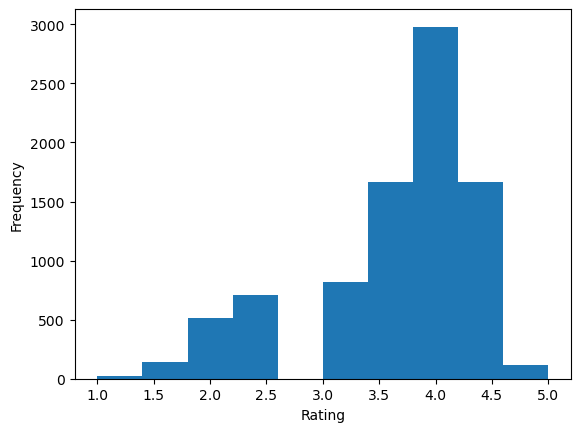

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_csv('big_data.csv')

# Create a histogram of the Rating column
plt.hist(df['Rating'])
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()



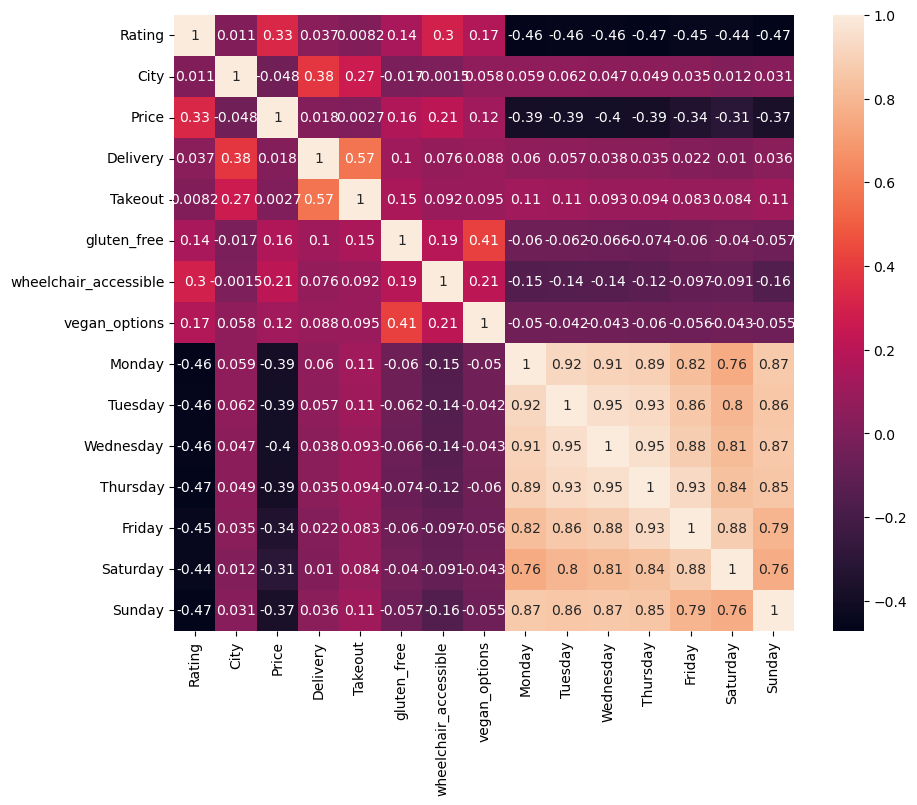

In [120]:
# Create a correlation matrix of all columns
plt.figure(figsize=(10, 8))

corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

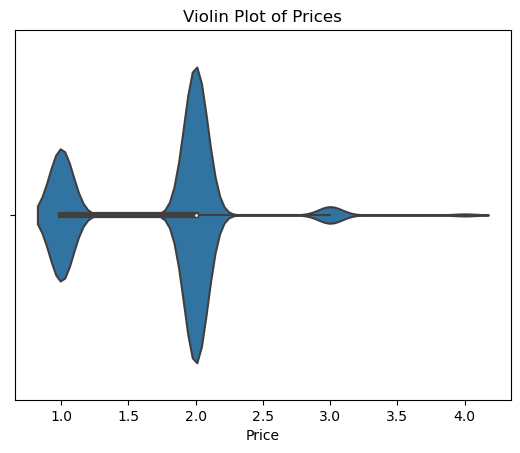

In [122]:
sns.violinplot(x='Price', data=df)
plt.xlabel('Price')
plt.title('Violin Plot of Prices')
plt.show()

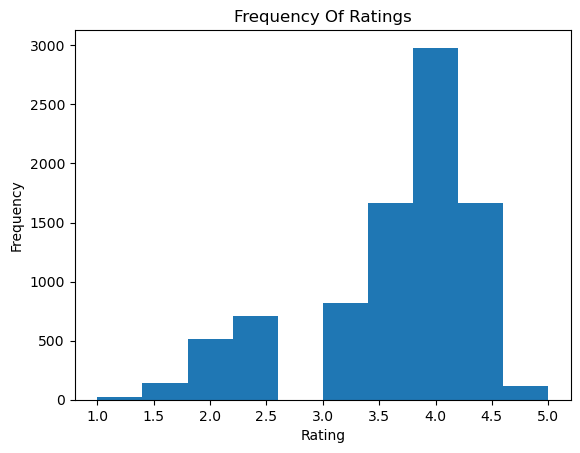

In [8]:
plt.hist(df['Rating'])
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Frequency Of Ratings')
plt.show()

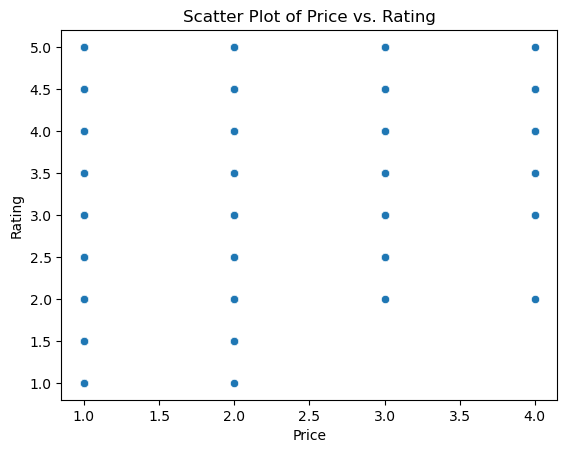

In [127]:
sns.scatterplot(x='Price', y='Rating', data=df)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Scatter Plot of Price vs. Rating')
plt.show()

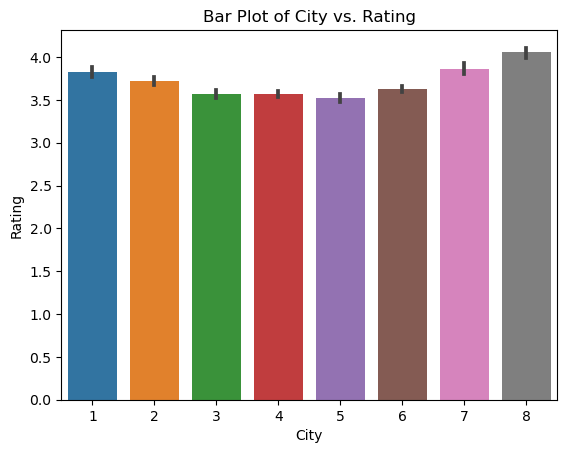

In [128]:
sns.barplot(x='City', y='Rating', data=df)
plt.xlabel('City')
plt.ylabel('Rating')
plt.title('Bar Plot of City vs. Rating')
plt.show()

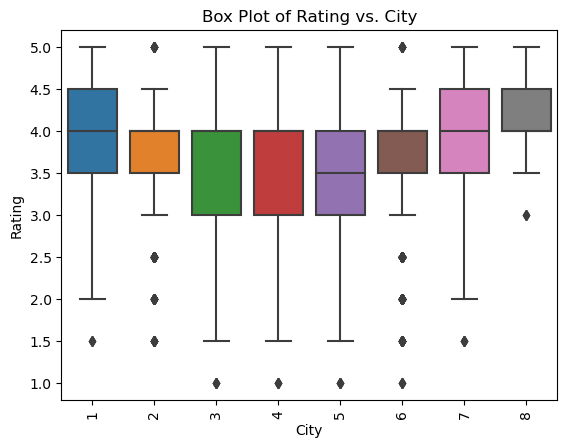

In [9]:

# Create a box plot of Rating vs. City
sns.boxplot(x='City', y='Rating', data=df)
plt.title('Box Plot of Rating vs. City')

plt.xticks(rotation=90)
plt.show()


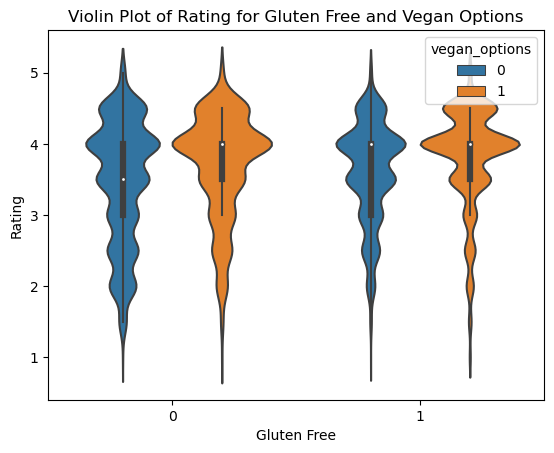

In [133]:

# Create a violin plot of Rating for each value of gluten_free and vegan_options
sns.violinplot(x='gluten_free', y='Rating', hue='vegan_options', data=df)
plt.xlabel('Gluten Free')
plt.ylabel('Rating')
plt.title('Violin Plot of Rating for Gluten Free and Vegan Options')
plt.show()

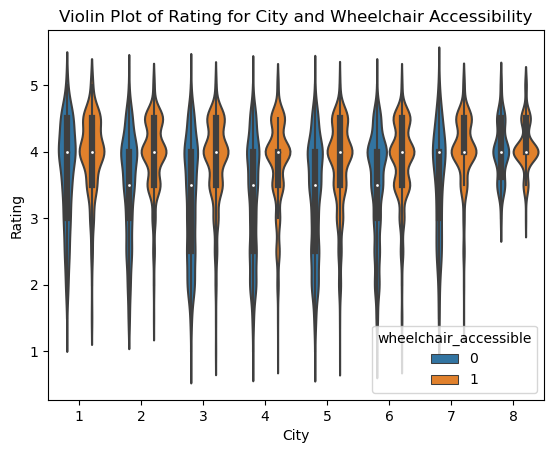

In [137]:
# Create a violin plot of Rating for each value of wheelchair_accessible and City
sns.violinplot(x='City', y='Rating', hue='wheelchair_accessible', data=df)
plt.xlabel('City')
plt.ylabel('Rating')
plt.title('Violin Plot of Rating for City and Wheelchair Accessibility')
plt.show()


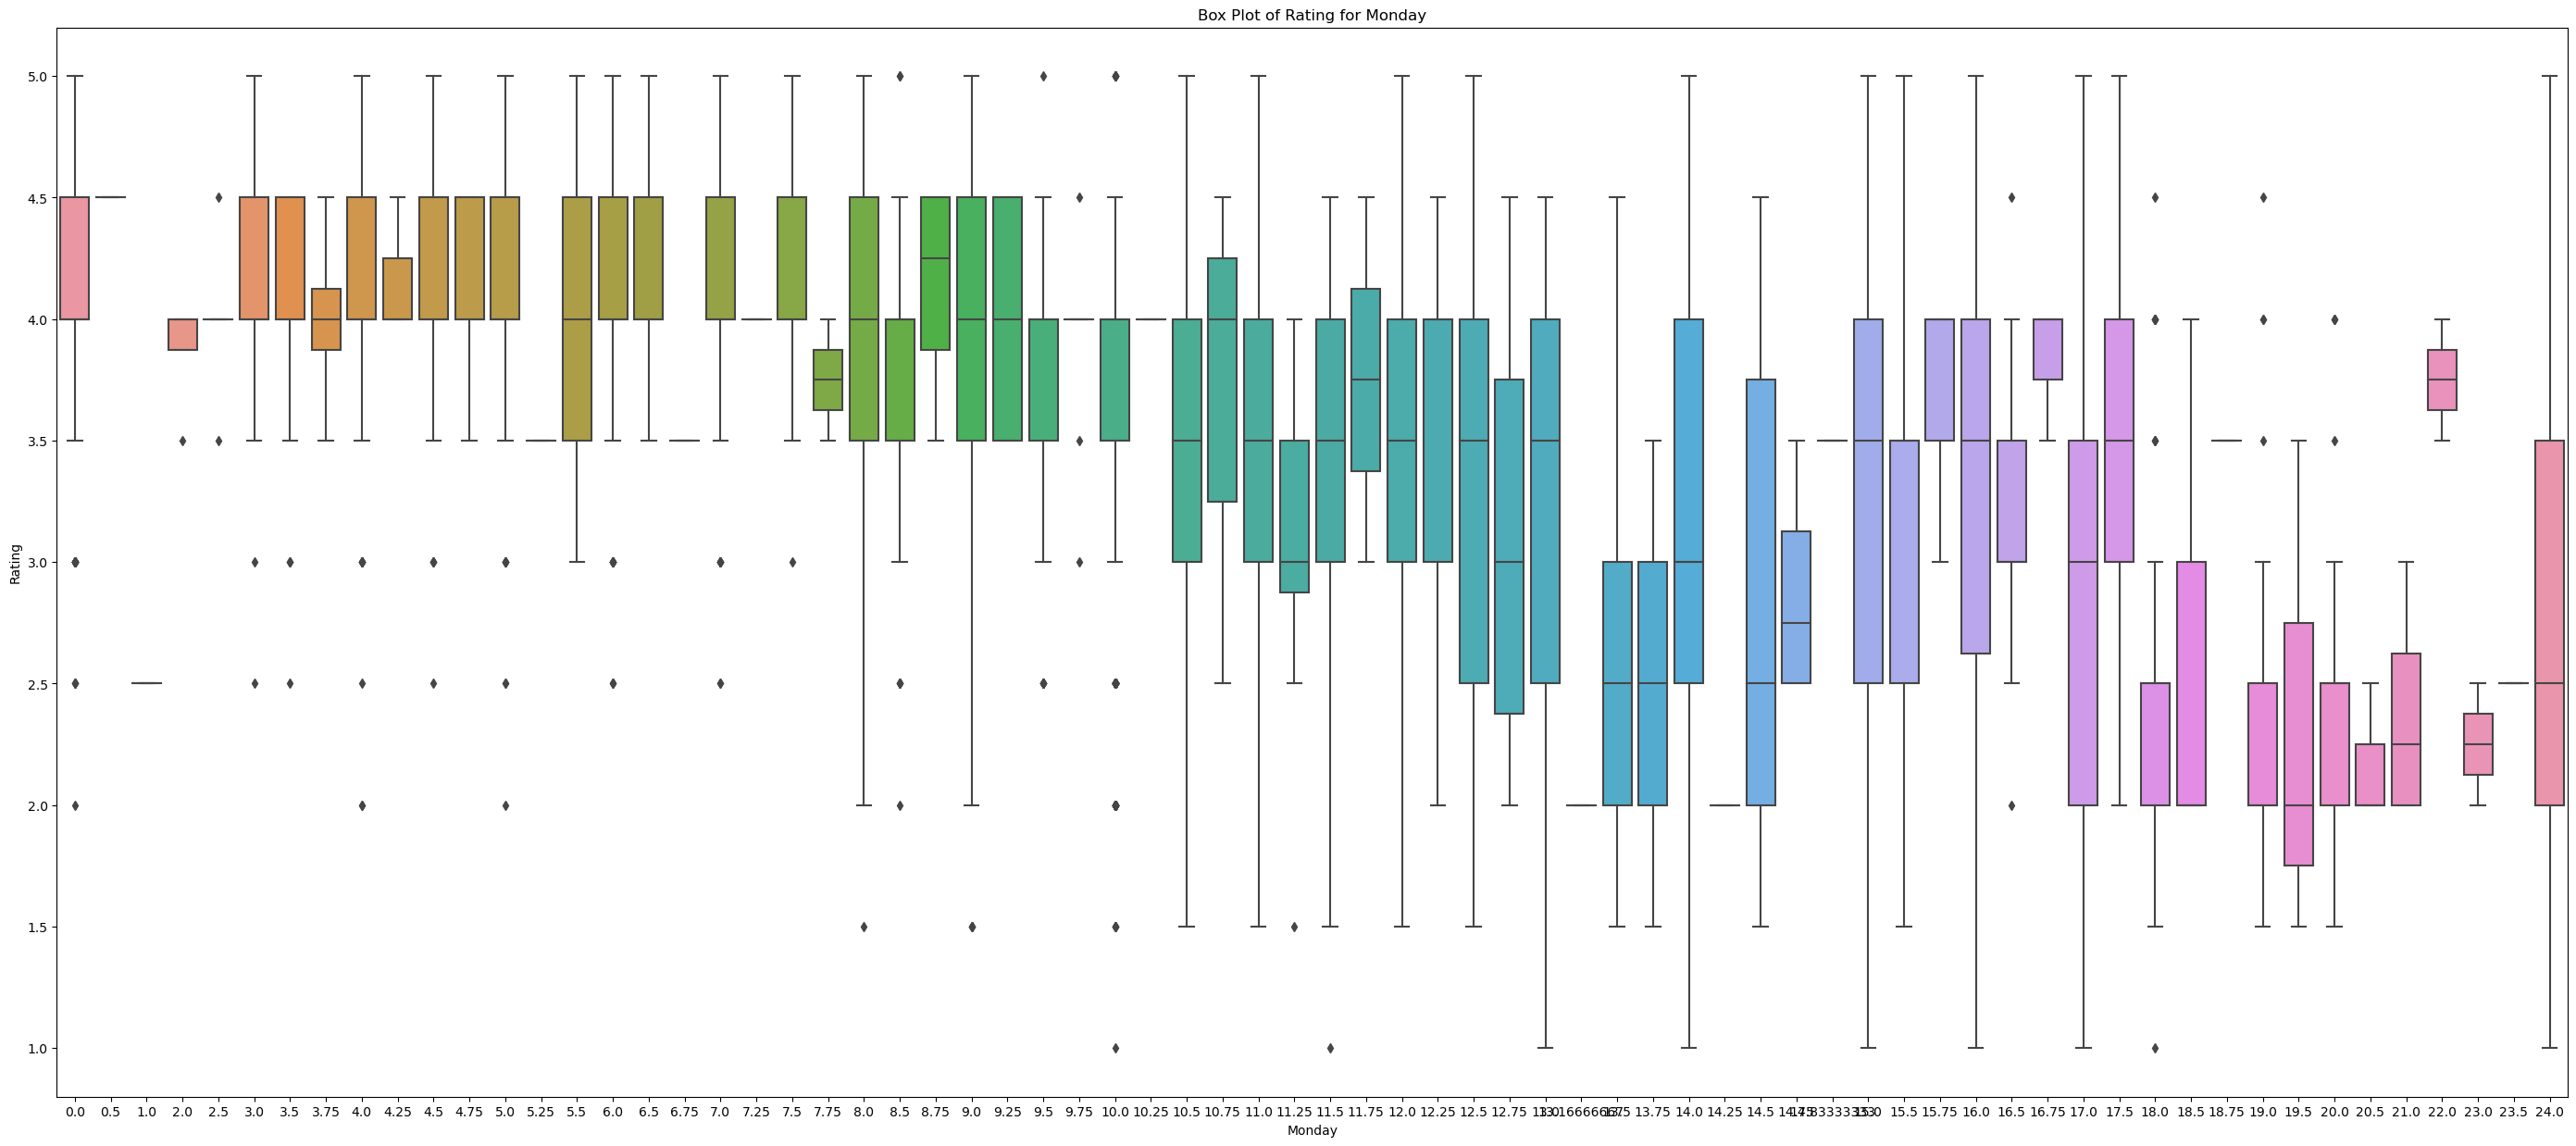

In [151]:
# Create a box plot of the distribution of ratings for Monday
fig, ax = plt.subplots(figsize=(35, 15))
sns.boxplot(x='Monday', y='Rating', data=df, ax=ax)
ax.set_xlabel('Monday')
ax.set_ylabel('Rating')
ax.set_title('Box Plot of Rating for Monday')
plt.show()

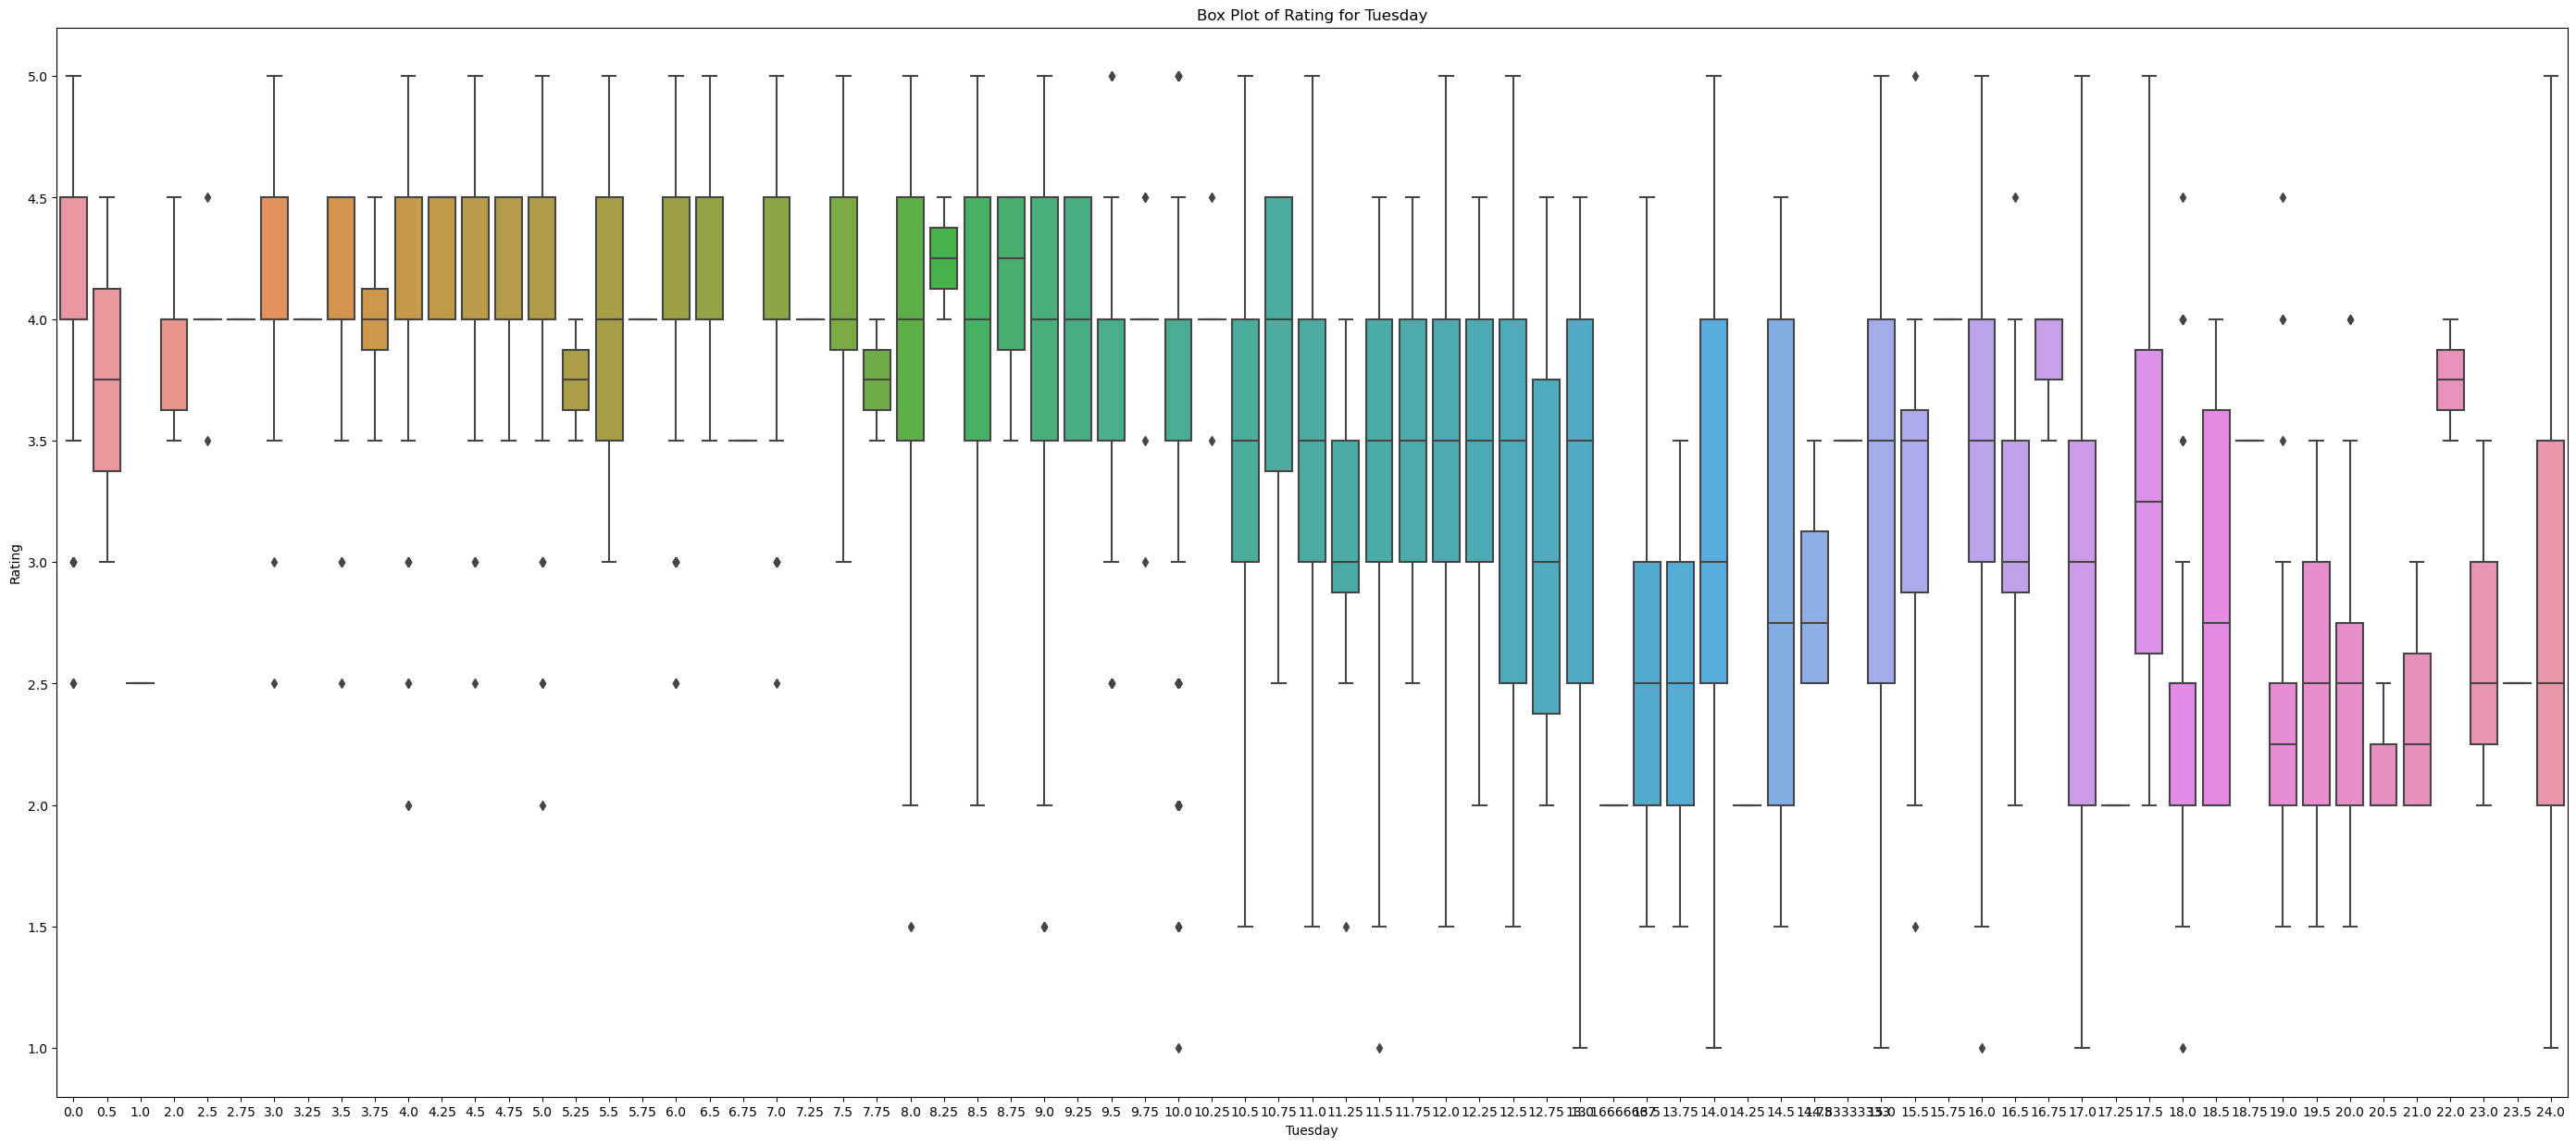

In [10]:
# Create a box plot of the distribution of ratings for Tuesday
fig, ax = plt.subplots(figsize=(35, 15))
sns.boxplot(x='Tuesday', y='Rating', data=df, ax=ax)
ax.set_xlabel('Tuesday')
ax.set_ylabel('Rating')
ax.set_title('Box Plot of Rating for Tuesday')
plt.show()

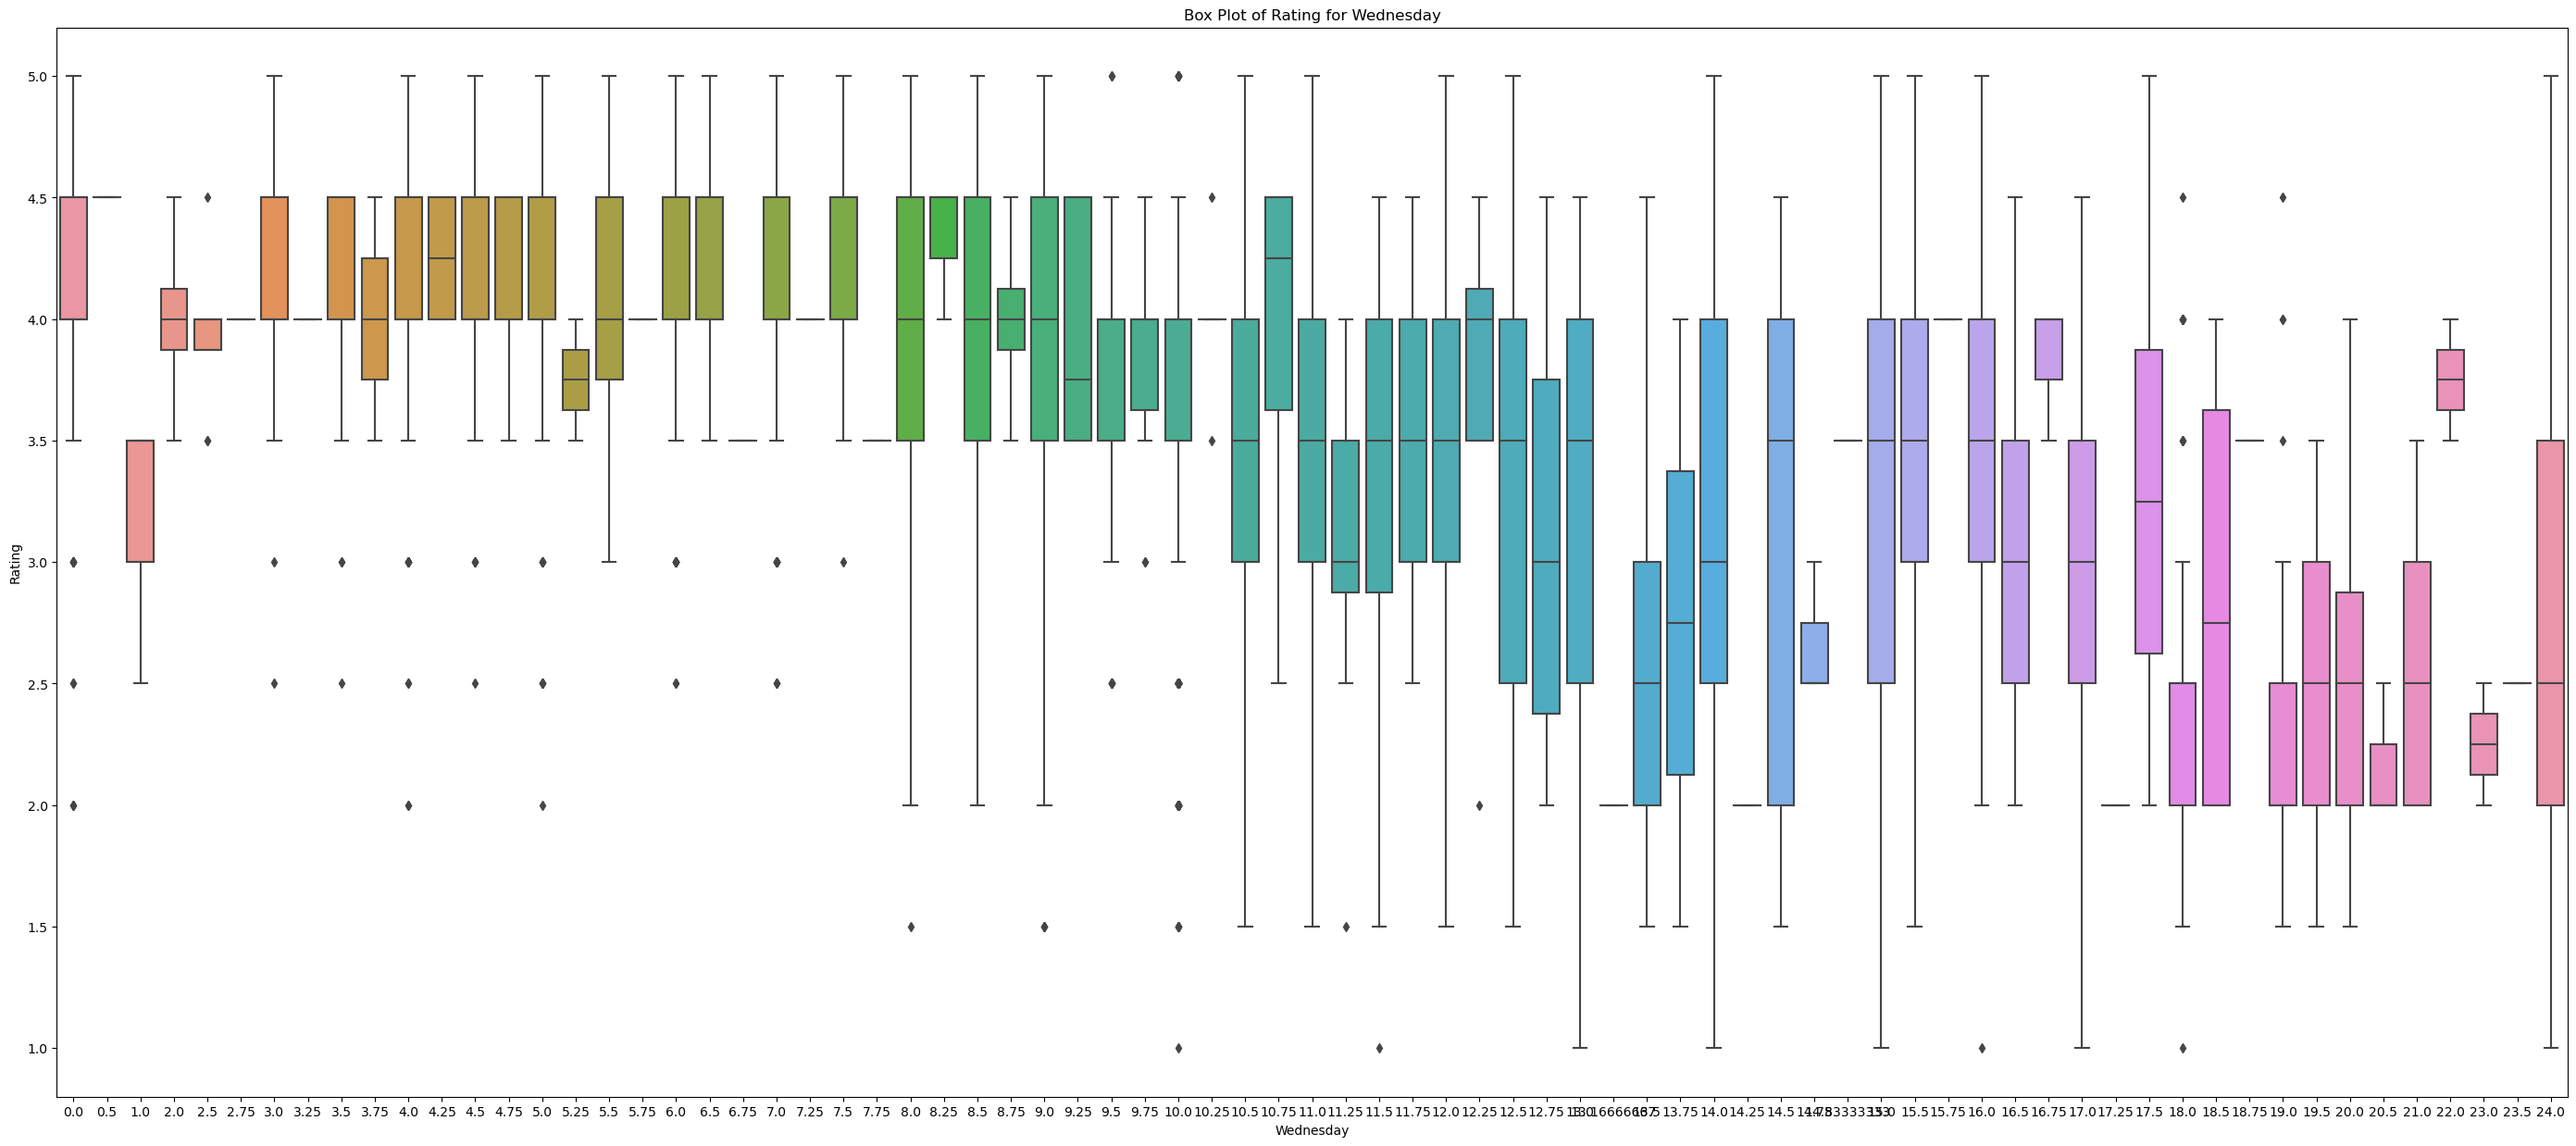

In [13]:
# Create a box plot of the distribution of ratings for Wednesday
fig, ax = plt.subplots(figsize=(35, 15))
sns.boxplot(x='Wednesday', y='Rating', data=df, ax=ax)
ax.set_xlabel('Wednesday')
ax.set_ylabel('Rating')
ax.set_title('Box Plot of Rating for Wednesday')
plt.show()

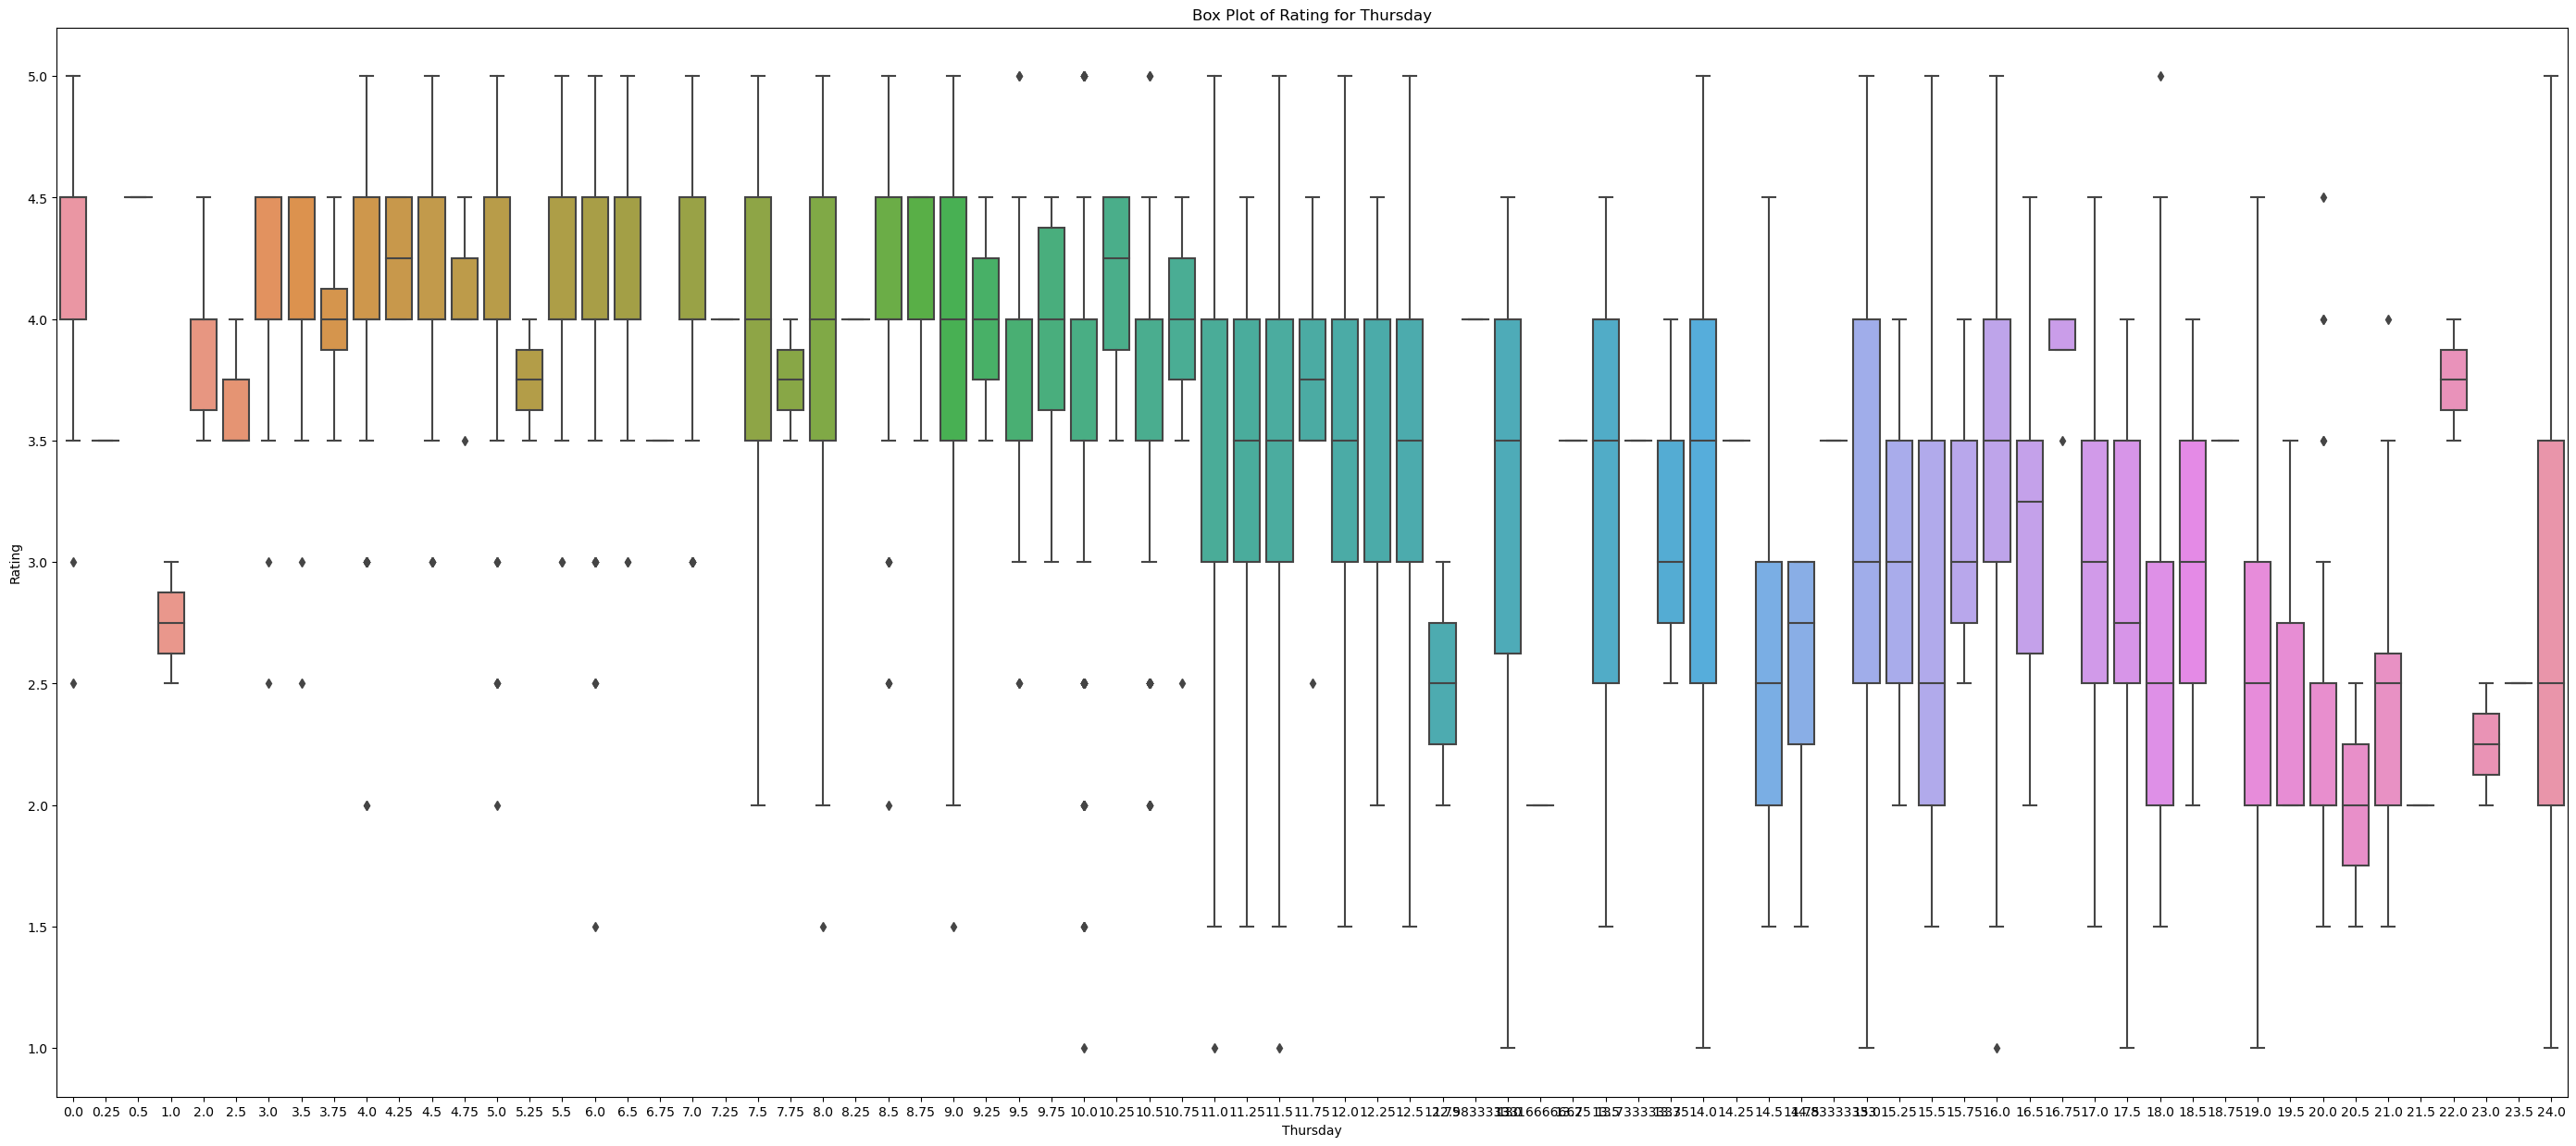

In [11]:
# Create a box plot of the distribution of ratings for Thursday
fig, ax = plt.subplots(figsize=(35, 15))
sns.boxplot(x='Thursday', y='Rating', data=df, ax=ax)
ax.set_xlabel('Thursday')
ax.set_ylabel('Rating')
ax.set_title('Box Plot of Rating for Thursday')
plt.show()

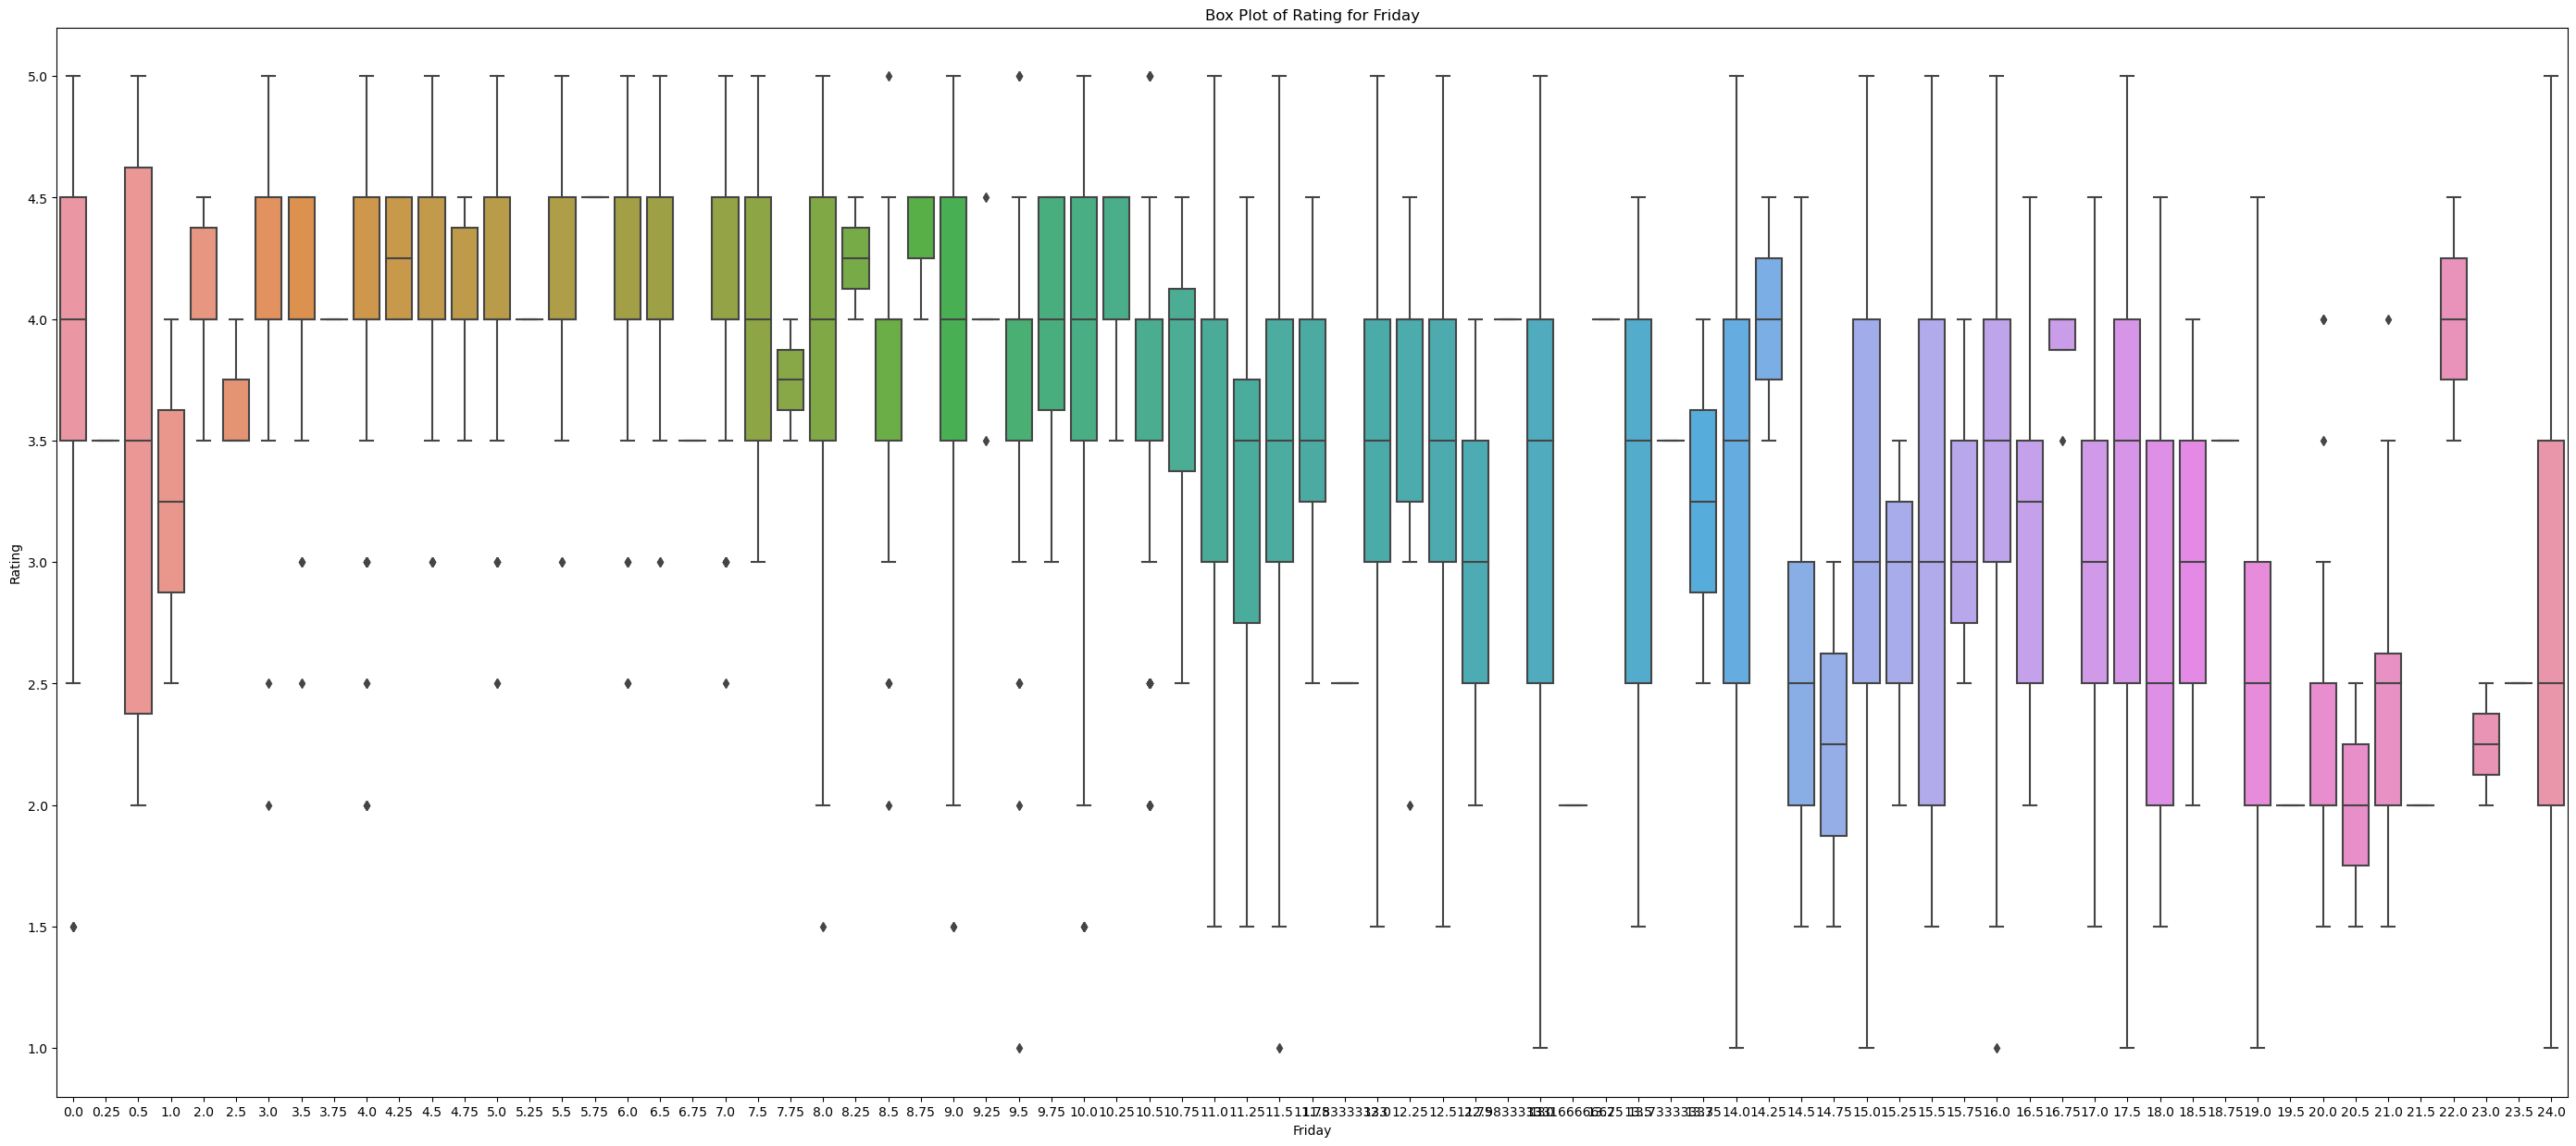

In [12]:
# Create a box plot of the distribution of ratings for Friday
fig, ax = plt.subplots(figsize=(35, 15))
sns.boxplot(x='Friday', y='Rating', data=df, ax=ax)
ax.set_xlabel('Friday')
ax.set_ylabel('Rating')
ax.set_title('Box Plot of Rating for Friday')
plt.show()

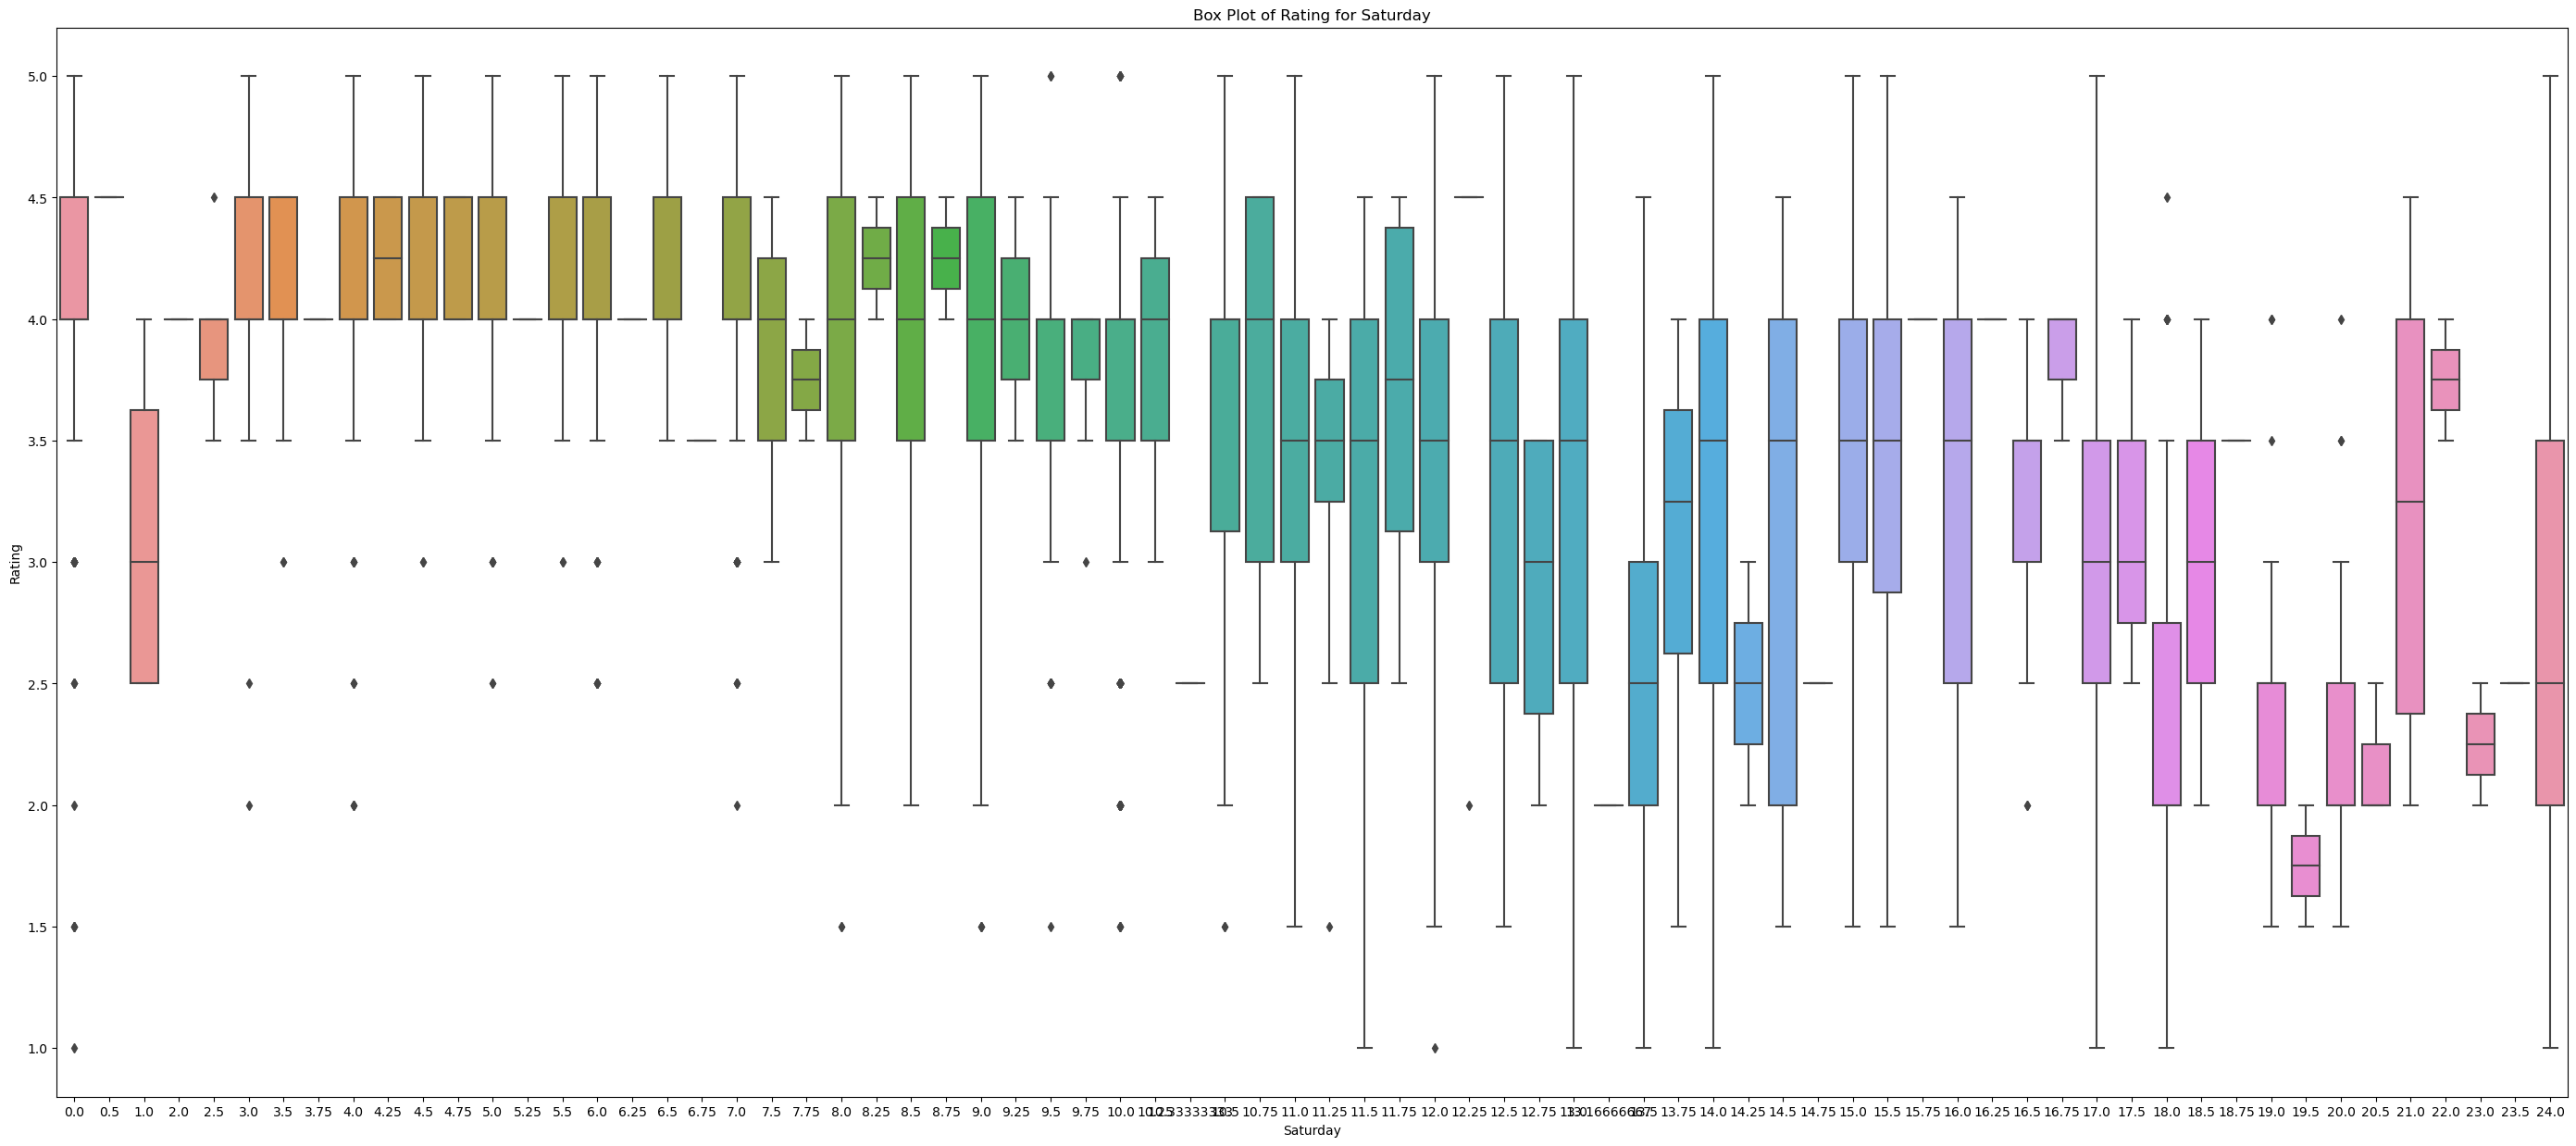

In [14]:
# Create a box plot of the distribution of ratings for Saturday
fig, ax = plt.subplots(figsize=(35, 15))
sns.boxplot(x='Saturday', y='Rating', data=df, ax=ax)
ax.set_xlabel('Saturday')
ax.set_ylabel('Rating')
ax.set_title('Box Plot of Rating for Saturday')
plt.show()

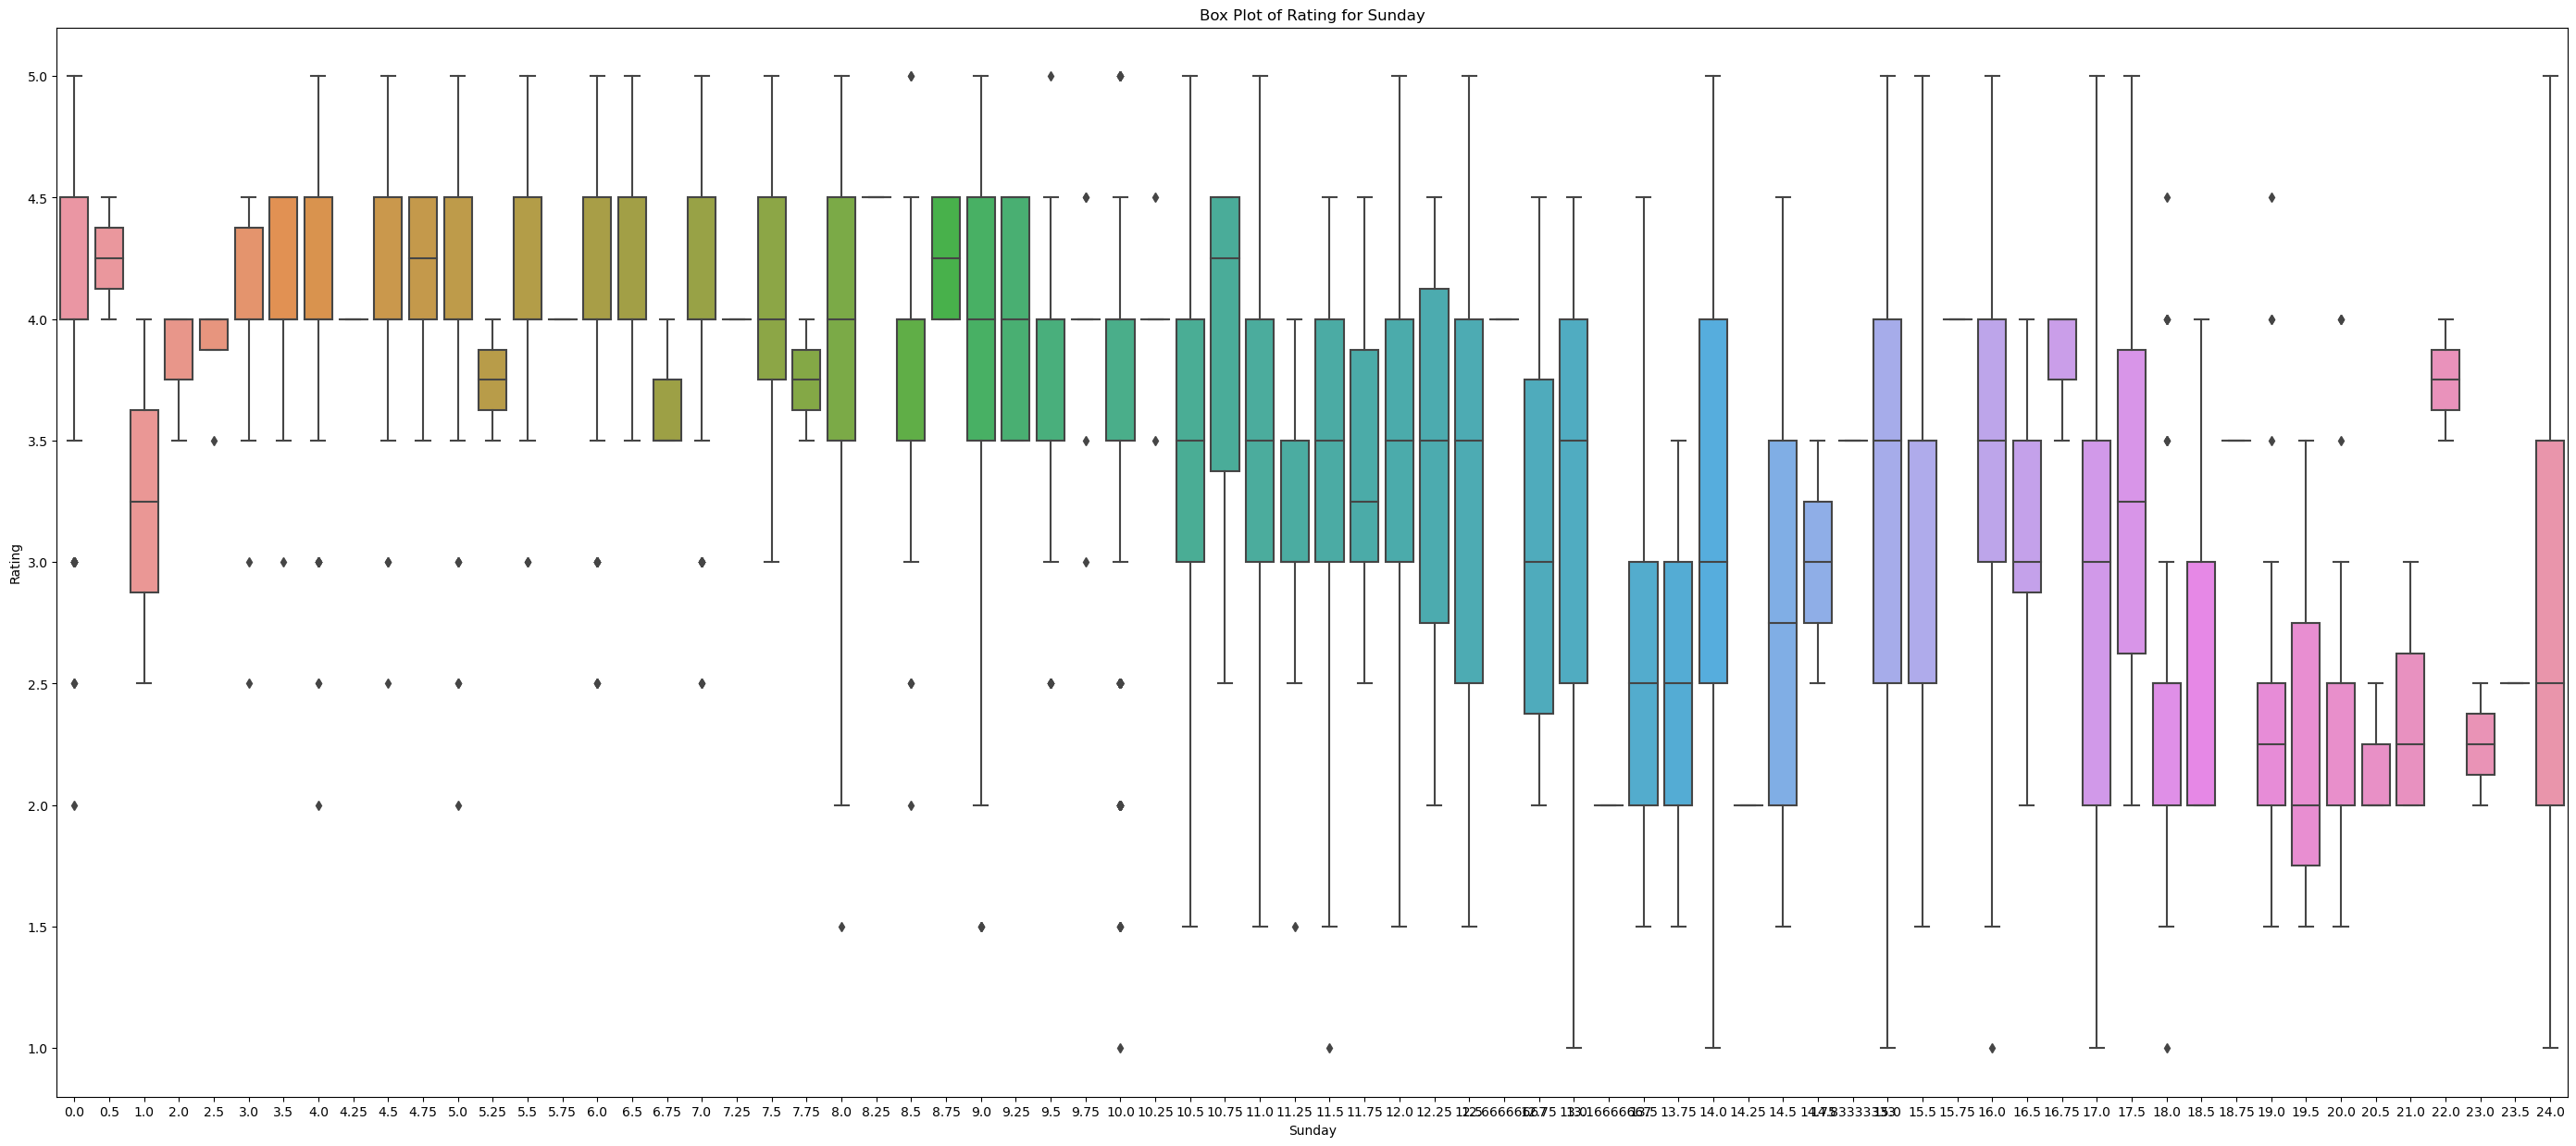

In [15]:
# Create a box plot of the distribution of ratings for Sunday
fig, ax = plt.subplots(figsize=(35, 15))
sns.boxplot(x='Sunday', y='Rating', data=df, ax=ax)
ax.set_xlabel('Sunday')
ax.set_ylabel('Rating')
ax.set_title('Box Plot of Rating for Sunday')
plt.show()

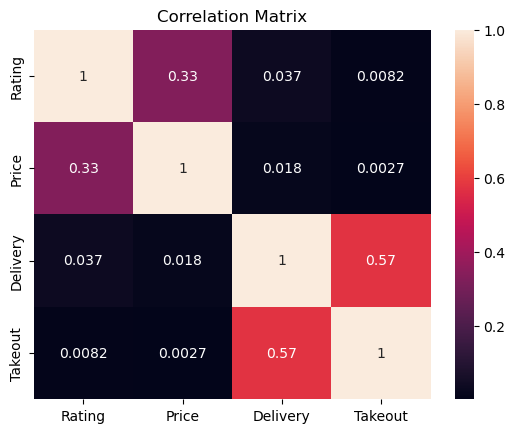

In [165]:
corr = df[['Rating', 'Price', 'Delivery', 'Takeout']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

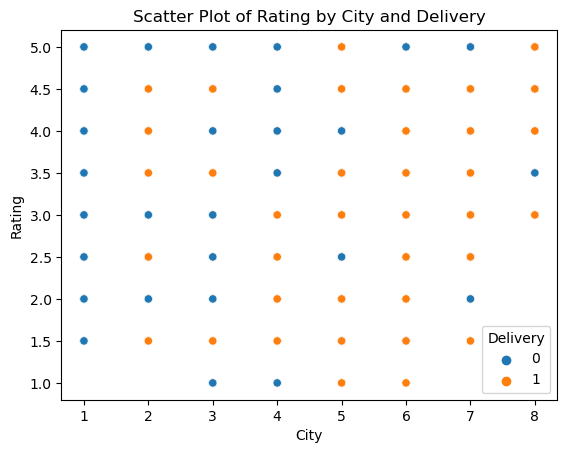

In [168]:
# Create a scatter plot of the rating against the city and delivery variables
sns.scatterplot(x='City', y='Rating', data=df, hue='Delivery')
plt.xlabel('City')
plt.ylabel('Rating')
plt.title('Scatter Plot of Rating by City and Delivery')
plt.show()

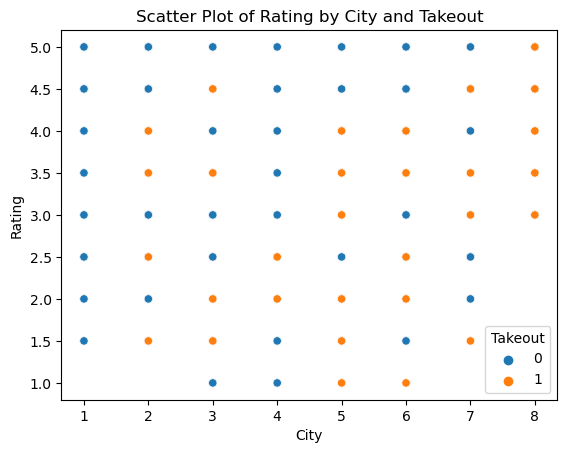

In [170]:
# Create a scatter plot of the rating against the city and takeout variables
sns.scatterplot(x='City', y='Rating', data=df, hue='Takeout')
plt.xlabel('City')
plt.ylabel('Rating')
plt.title('Scatter Plot of Rating by City and Takeout')
plt.show()

In [217]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load the CSV file into a DataFrame
df = pd.read_csv('big_data.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['id', 'Name', 'Rating'], axis=1), df['Rating'], test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the performance of the machine learning algorithm
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'Training score: {train_score:.3f}, Test score: {test_score:.3f}')

# Use the linear regression model to predict the ratings for the test data
predictions = model.predict(X_test)
print(predictions)


Training score: 0.323, Test score: 0.323
[3.36631    3.97649698 3.04648817 ... 3.33376071 3.80984174 3.34203153]


In [235]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Load the CSV file into a DataFrame
df = pd.read_csv('big_data.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['id', 'Name', 'Rating'], axis=1), df['Rating'], test_size=0.2, random_state=42)

# Train the KNN regression model
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Evaluate the performance of the KNN regression model
train_score = r2_score(y_train, model.predict(X_train))
test_score = r2_score(y_test, model.predict(X_test))
print(f'Training score: {train_score:.3f}, Test score: {test_score:.3f}')

# Use the KNN regression model to predict the ratings for the test data
predictions = model.predict(X_test)
print(predictions)


Training score: 0.563, Test score: 0.343
[3.4 4.3 2.2 ... 3.9 3.7 4. ]


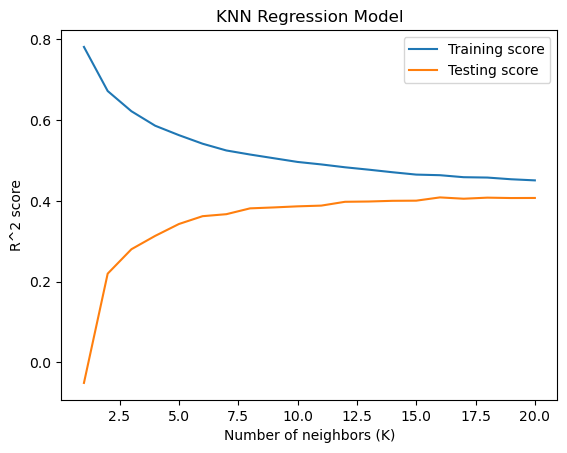

Best value of K: 16, Test score: 0.409


In [238]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Load the CSV file into a DataFrame
df = pd.read_csv('big_data.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['id', 'Name', 'Rating'], axis=1), df['Rating'], test_size=0.2, random_state=42)

# Train and evaluate KNN models with different numbers of neighbors
k_values = range(1, 21)
train_scores = []
test_scores = []
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score = r2_score(y_train, model.predict(X_train))
    test_score = r2_score(y_test, model.predict(X_test))
    train_scores.append(train_score)
    test_scores.append(test_score)
    
best_k = k_values[test_scores.index(max(test_scores))]

# Plot the R^2 scores for the KNN models
plt.plot(k_values, train_scores, label='Training score')
plt.plot(k_values, test_scores, label='Testing score')
plt.title('KNN Regression Model')
plt.xlabel('Number of neighbors (K)')
plt.ylabel('R^2 score')
plt.legend()
plt.show()
print(f'Best value of K: {best_k}, Test score: {max(test_scores):.3f}')

In [240]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load the CSV file into a DataFrame
df = pd.read_csv('big_data.csv')

# Split the data into features (X) and target (y)
X = df.drop(['id', 'Name', 'Rating'], axis=1)
y = df['Rating']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a linear regression model on the reduced data
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the performance of the linear regression model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f'Training score: {train_score:.3f}, Test score: {test_score:.3f}')


Training score: 0.314, Test score: 0.318


In [242]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Load the CSV file into a DataFrame
df = pd.read_csv('big_data.csv')

# Split the data into features (X) and target (y)
X = df.drop(['id', 'Name', 'Rating'], axis=1)
y = df['Rating']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor on the reduced data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the performance of the Random Forest Regressor
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f'Training score: {train_score:.3f}, Test score: {test_score:.3f}')


Training score: 0.831, Test score: 0.360


In [244]:

# Load the CSV file into a DataFrame
df = pd.read_csv('big_data.csv')

# Split the data into features (X) and target (y)
X = df.drop(['id', 'Name', 'Rating'], axis=1)
y = df['Rating']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the performance of the Random Forest Regressor model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f'Training score: {train_score:.3f}, Test score: {test_score:.3f}')


Training score: 0.834, Test score: 0.364
